## Detección de Fraude en Tarjetas de Crédito
##
### **Dataset:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### 1. Importar Librerías


In [3]:
# =========================================
# 1. Importar Librerías
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de visualización
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-darkgrid') 
# Para evitar warnings futuros de seaborn
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### 2. Cargar el dataset.

In [19]:
# =========================================
# 2. Cargar el Dataset
# =========================================
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: Archivo 'creditcard.csv' no encontrado.")
    print("Por favor, descarga el dataset de Kaggle y colócalo en la carpeta correcta.")
    df = None # Asigna None para evitar errores en celdas posteriores si el archivo no se carga


Dataset cargado exitosamente.


### 3. Inspección Inicial de los Datos

In [20]:
# 3. Inspección Inicial de los Datos

if df is not None:
    # Mostrar las primeras 5 filas
    print("Primeras 5 filas del dataset:")
    display(df.head())

    # Verificar dimensiones (filas, columnas)
    print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

    # Obtener información sobre columnas, tipos de datos y memoria
    # print("\nInformación del DataFrame (columnas, tipos, no-nulos):")
    # df.info()

    # Comprobar valores duplicados
    print("\nNúmero de filas duplicadas en el dataset:")
    num_duplicates = df.duplicated().sum()
    print(num_duplicates)

    # Comprobar si hay valores nulos
    print("\nConteo de valores nulos por columna:")
    print(df.isnull().sum())
else:
    print("El DataFrame no se cargó. Saltando inspección.")

Primeras 5 filas del dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dimensiones del dataset: 284807 filas y 31 columnas

Número de filas duplicadas en el dataset:
1081

Conteo de valores nulos por columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### **Observaciones Iniciales:**
* El dataset contiene 31 columnas.
* 'Time' y 'Amount' son las únicas características no anonimizadas. 'Time' es el tiempo en segundos desde la primera transacción. 'Amount' es el monto de la transacción.
* V1 a V28 son componentes principales (PCA) para proteger la identidad de los usuarios.
* 'Class' es la variable objetivo: 1 para fraude, 0 para legítima.
* No parece haber valores nulos.
* Existen 1081 registros duplicados.

In [21]:
# 3.1 Eliminación de Duplicados

if df is not None and num_duplicates > 0:
    print(f"Eliminando {num_duplicates} filas duplicadas...")
    df.drop_duplicates(inplace=True)
    print(f"Dataset después de eliminar duplicados: {df.shape}")
    # Resetear el índice después de eliminar filas es buena práctica
    df.reset_index(drop=True, inplace=True) 
    print("Índice reseteado.")
elif df is not None:
     print("No se eliminaron filas duplicadas (no se encontraron).")
else:
     print("El DataFrame no se cargó. No se eliminaron duplicados.")

Eliminando 1081 filas duplicadas...
Dataset después de eliminar duplicados: (283726, 31)
Índice reseteado.


### 4. Análisis de la Variable Objetivo ('Class') - Desbalanceo

Distribución de Clases:
Class
0    283253
1       473
Name: count, dtype: int64

Porcentaje de transacciones Legítimas (Clase 0): 99.8333%
Porcentaje de transacciones Fraudulentas (Clase 1): 0.1667%


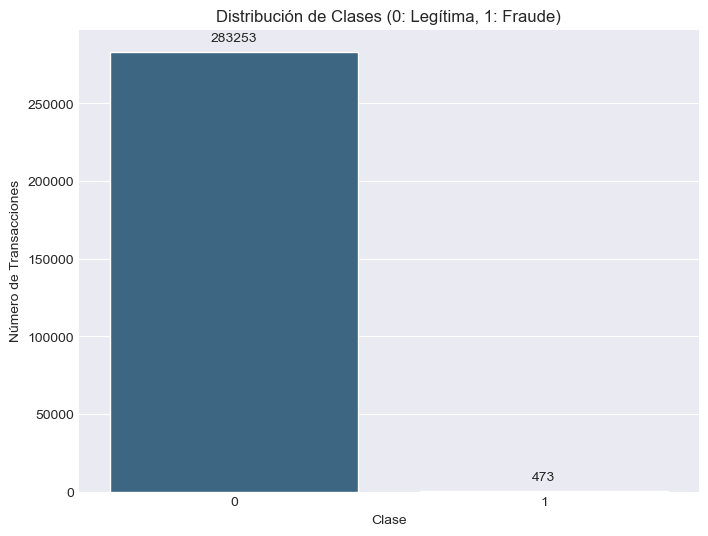

In [23]:
# 4. Análisis de la Variable Objetivo ('Class') - Desbalanceo

if df is not None:
    # Contar ocurrencias de cada clase
    class_counts = df['Class'].value_counts()
    print("Distribución de Clases:")
    print(class_counts)

    # Calcular porcentajes
    total_transactions = len(df)
    fraud_percentage = (class_counts[1] / total_transactions) * 100
    legit_percentage = (class_counts[0] / total_transactions) * 100
    print(f"\nPorcentaje de transacciones Legítimas (Clase 0): {legit_percentage:.4f}%")
    print(f"Porcentaje de transacciones Fraudulentas (Clase 1): {fraud_percentage:.4f}%")

    # Visualizar la distribución de clases
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df, palette='viridis')
    plt.title('Distribución de Clases (0: Legítima, 1: Fraude)')
    plt.xlabel('Clase')
    plt.ylabel('Número de Transacciones')
    
    for index, value in enumerate(class_counts):
        plt.text(index, value + 5000, str(value), ha='center', va='bottom') # Ajusta el offset (+5000) si es necesario
    plt.show()
else:
    print("El DataFrame no se cargó. Saltando análisis de clase.")

**Observación Clave:** El dataset está **extremadamente desbalanceado**. Las transacciones fraudulentas son una fracción muy pequeña del total (menos del 0.2%). Esto confirma la necesidad de usar técnicas especiales (SMOTE, GANs, cost-sensitive learning, etc.) y métricas adecuadas (Precision-Recall, F1, AUC PR).


### 5. Análisis de 'Time' y 'Amount'

Estadísticas descriptivas para 'Time' y 'Amount':


,Time,Amount
count,283726.000000,283726.000000
mean,94811.077600,88.472687
std,47481.047891,250.399437
min,0.000000,0.000000
25%,54204.750000,5.600000
50%,84692.500000,22.000000
75%,139298.000000,77.510000
max,172792.000000,25691.160000


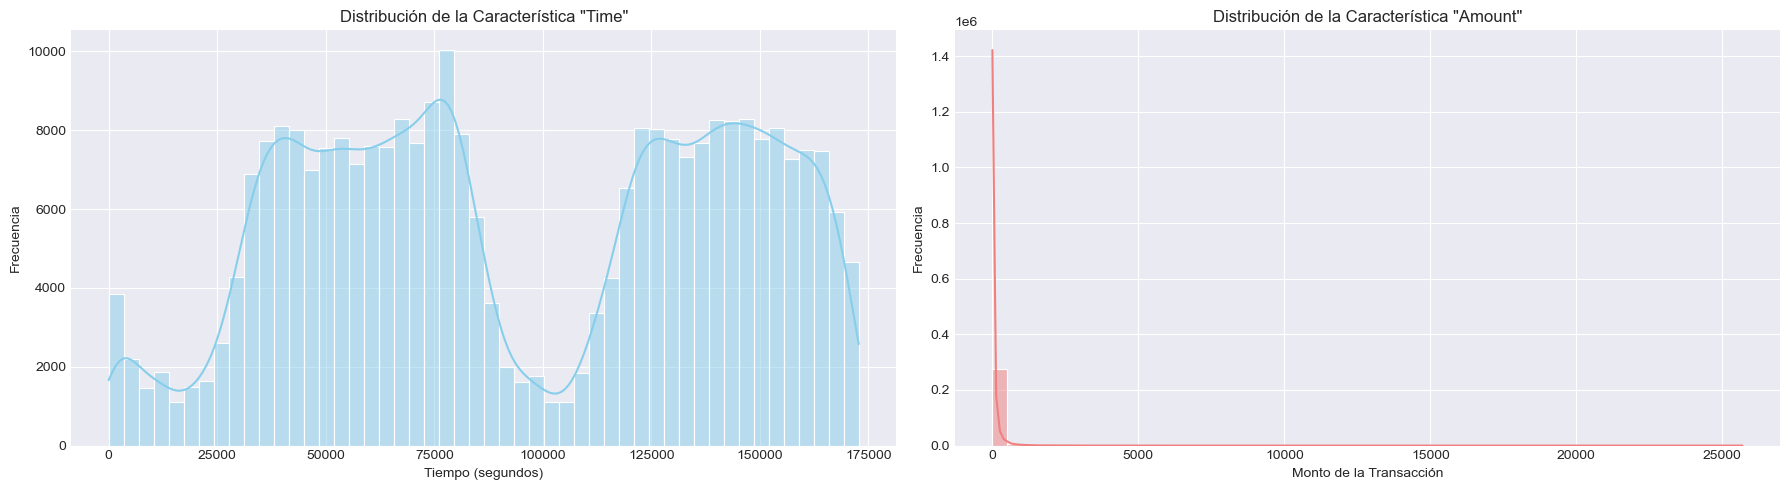

In [30]:
# 5. Análisis de 'Time' y 'Amount'

if df is not None:
    print("Estadísticas descriptivas para 'Time' y 'Amount':")
    display(df[['Time', 'Amount']].describe())

    # Visualizar distribuciones
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Distribución de Time
    sns.histplot(df['Time'], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Distribución de la Característica "Time"')
    axes[0].set_xlabel('Tiempo (segundos)')
    axes[0].set_ylabel('Frecuencia')

    # Distribución de Amount
    sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[1], color='lightcoral')
    axes[1].set_title('Distribución de la Característica "Amount"')
    axes[1].set_xlabel('Monto de la Transacción')
    axes[1].set_ylabel('Frecuencia')
    # Podríamos necesitar escala logarítmica para Amount debido a la alta asimetría
    # axes[1].set_xscale('log') # Descomentar para probar escala logarítmica

    plt.tight_layout()
    plt.show()

else:
    print("El DataFrame no se cargó. Saltando análisis de Time/Amount.")

#### 5.1 Escalando logarítmicamente 'Amount' debido a la alta asimetría

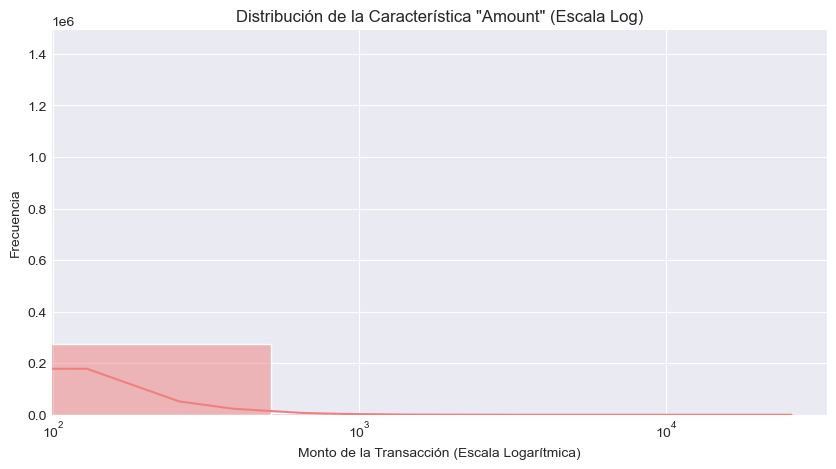

In [43]:
# 5.1 Escalando logarítmicamente 'Amount' debido a la alta asimetría

if df is not None:
    plt.figure(figsize=(10, 5))
    
    # Graficar el histograma de Amount
    ax_log_amount = sns.histplot(df['Amount'], bins=50, kde=True, color='lightcoral')
    
    # Aplicar la escala logarítmica al eje X
    ax_log_amount.set_xscale('log') 
    
    # Añadir título y etiquetas
    ax_log_amount.set_title('Distribución de la Característica "Amount" (Escala Log)')
    ax_log_amount.set_xlabel('Monto de la Transacción (Escala Logarítmica)')
    ax_log_amount.set_ylabel('Frecuencia')
    
    plt.show() 
else:
    print("El DataFrame no se cargó. Saltando análisis de Time/Amount.")

#### **Observaciones 'Time' y 'Amount':**
<!-- * **Time:** Parece tener una distribución bimodal, posiblemente reflejando ciclos diurnos/nocturnos a lo largo de los 2 días que cubre el dataset. Podría ser útil transformarla (ej. hora del día) pero dado que son solo 2 días, su utilidad directa podría ser limitada. Es candidata a ser escalada.
* **Amount:** La distribución está muy sesgada a la derecha (la mayoría de las transacciones son de montos bajos). La media es mucho mayor que la mediana. Los valores máximos son muy altos. **Definitivamente necesita ser escalada** antes de usar modelos sensibles a la escala (SVM, NN). La escala logarítmica podría ayudar en la visualización o incluso como transformación. -->
'Time':

- Cobertura Temporal: La variable 'Time' representa los segundos transcurridos desde la primera transacción en el dataset. El eje X va aproximadamente hasta 170,000 segundos, lo que equivale a unas 48 horas (2 días), confirmando el marco temporal del dataset.

- Distribución Bimodal: El histograma muestra claramente dos picos principales de actividad, separados por valles. Esto sugiere un patrón cíclico, muy probablemente relacionado con las horas del día (mayor actividad durante el día, menor durante la noche) a lo largo de los dos días cubiertos.

- Implicación para Modelado: Aunque existe un patrón, usar el 'Time' directamente como segundos acumulados podría no ser óptimo. Podría ser más útil transformarlo (ej. calcular la hora del día o día de la semana, aunque aquí solo son 2 días). En cualquier caso, para modelos sensibles a la escala (SVM, NN), será necesario escalar esta característica debido a su amplio rango.

'Amount':

- Asimetría Extrema: El gráfico con escala lineal muestra de forma contundente que la distribución de 'Amount' está extremadamente sesgada hacia la derecha. La inmensa mayoría de las transacciones son de montos muy bajos (muy cerca de 0), mientras que unas pocas transacciones tienen montos muy altos (la larga cola a la derecha). Esto hace que la media y la mediana de 'Amount' sean muy diferentes.

- Visualización Logarítmica: Al aplicar la escala logarítmica al eje X, la distribución se "descomprime". Se puede apreciar mejor la forma de la distribución para los montos más comunes (parece tener un pico entre 1 y 100 unidades monetarias) y cómo decrece la frecuencia para montos mayores. Sugiere que los montos podrían seguir aproximadamente una distribución log-normal (común en valores monetarios).

- Rango Amplio y Outliers: Los montos varían desde 0 hasta valores muy elevados (superiores a 25,000 en el gráfico lineal). Las transacciones de alto valor son claramente valores atípicos (outliers) en términos de frecuencia.

- Implicación para Modelado: Es absolutamente necesario escalar la característica 'Amount' antes de usar modelos como SVM o Redes Neuronales, que son sensibles a las diferentes escalas de las características. Opciones comunes son StandardScaler (aunque sensible a outliers) o RobustScaler (más resistente a outliers). Alternativamente, se podría aplicar una transformación logarítmica (np.log1p) antes de escalar para reducir la asimetría.

#### Análisis de 'Amount' para Transacciones Fraudulentas vs. Legítimas

Estadísticas descriptivas de 'Amount' para cada clase:


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


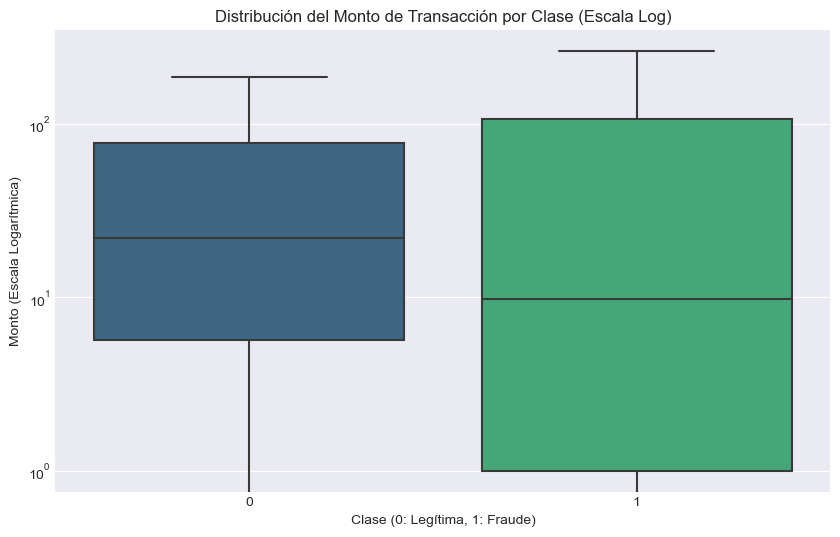

In [48]:
# Análisis de 'Amount' para Transacciones Fraudulentas vs. Legítimas

if df is not None:
    print("Estadísticas descriptivas de 'Amount' para cada clase:")
    display(df.groupby('Class')['Amount'].describe())

    # Visualización comparativa (Boxplot o Violinplot)
    plt.figure(figsize=(10, 6))
    # Usaremos escala logarítmica en el eje Y para mejor visualización debido a la asimetría
    sns.boxplot(x='Class', y='Amount', data=df, palette='viridis', showfliers=False) # showfliers=False para no mostrar outliers individuales que saturan el gráfico
    plt.yscale('log') # Aplicar escala logarítmica
    plt.title('Distribución del Monto de Transacción por Clase (Escala Log)')
    plt.xlabel('Clase (0: Legítima, 1: Fraude)')
    plt.ylabel('Monto (Escala Logarítmica)')
    plt.show()
else:
    print("El DataFrame no se cargó. Saltando análisis comparativo.")

**Observación Comparativa 'Amount':** 
- Comparación de Medianas: La observación más interesante aquí es la mediana (la línea horizontal dentro de cada caja). Se aprecia visiblemente que la mediana del monto ('Amount') para las transacciones fraudulentas (Clase 1) es más baja que la mediana para las transacciones legítimas (Clase 0).

- Rangos Intercuartílicos (IQR - las cajas): Las cajas, que representan el 50% central de los datos para cada clase (entre el percentil 25 y 75), también muestran diferencias. La caja para la Clase 1 parece estar situada en un rango ligeramente inferior o tener una dispersión distinta a la de la Clase 0, aunque todavía existe un solapamiento considerable.

- Bigotes (Whiskers): Los "bigotes" (las líneas que se extienden desde las cajas) indican el rango aproximado de los datos "normales" (excluyendo los outliers que hemos ocultado). También muestran un gran solapamiento entre las dos clases.

- Importancia de showfliers=False y Escala Log: Sin ocultar los outliers y sin la escala logarítmica, sería mucho más difícil apreciar esta diferencia en las medianas y en la forma general de las distribuciones centrales, ya que los valores extremos dominarían la visualización.

Aunque el monto por sí solo no separa perfectamente las clases (hay mucho solapamiento), esta diferencia en la distribución central (especialmente la mediana más baja para el fraude) sugiere que la variable 'Amount', especialmente cuando se considera en conjunto con otras características, puede tener valor predictivo. Los modelos de Machine Learning podrían aprender a utilizar esta tendencia.

### 6. Vistazo a las Características PCA (V1-V28)

Generando histogramas para V1-V28...


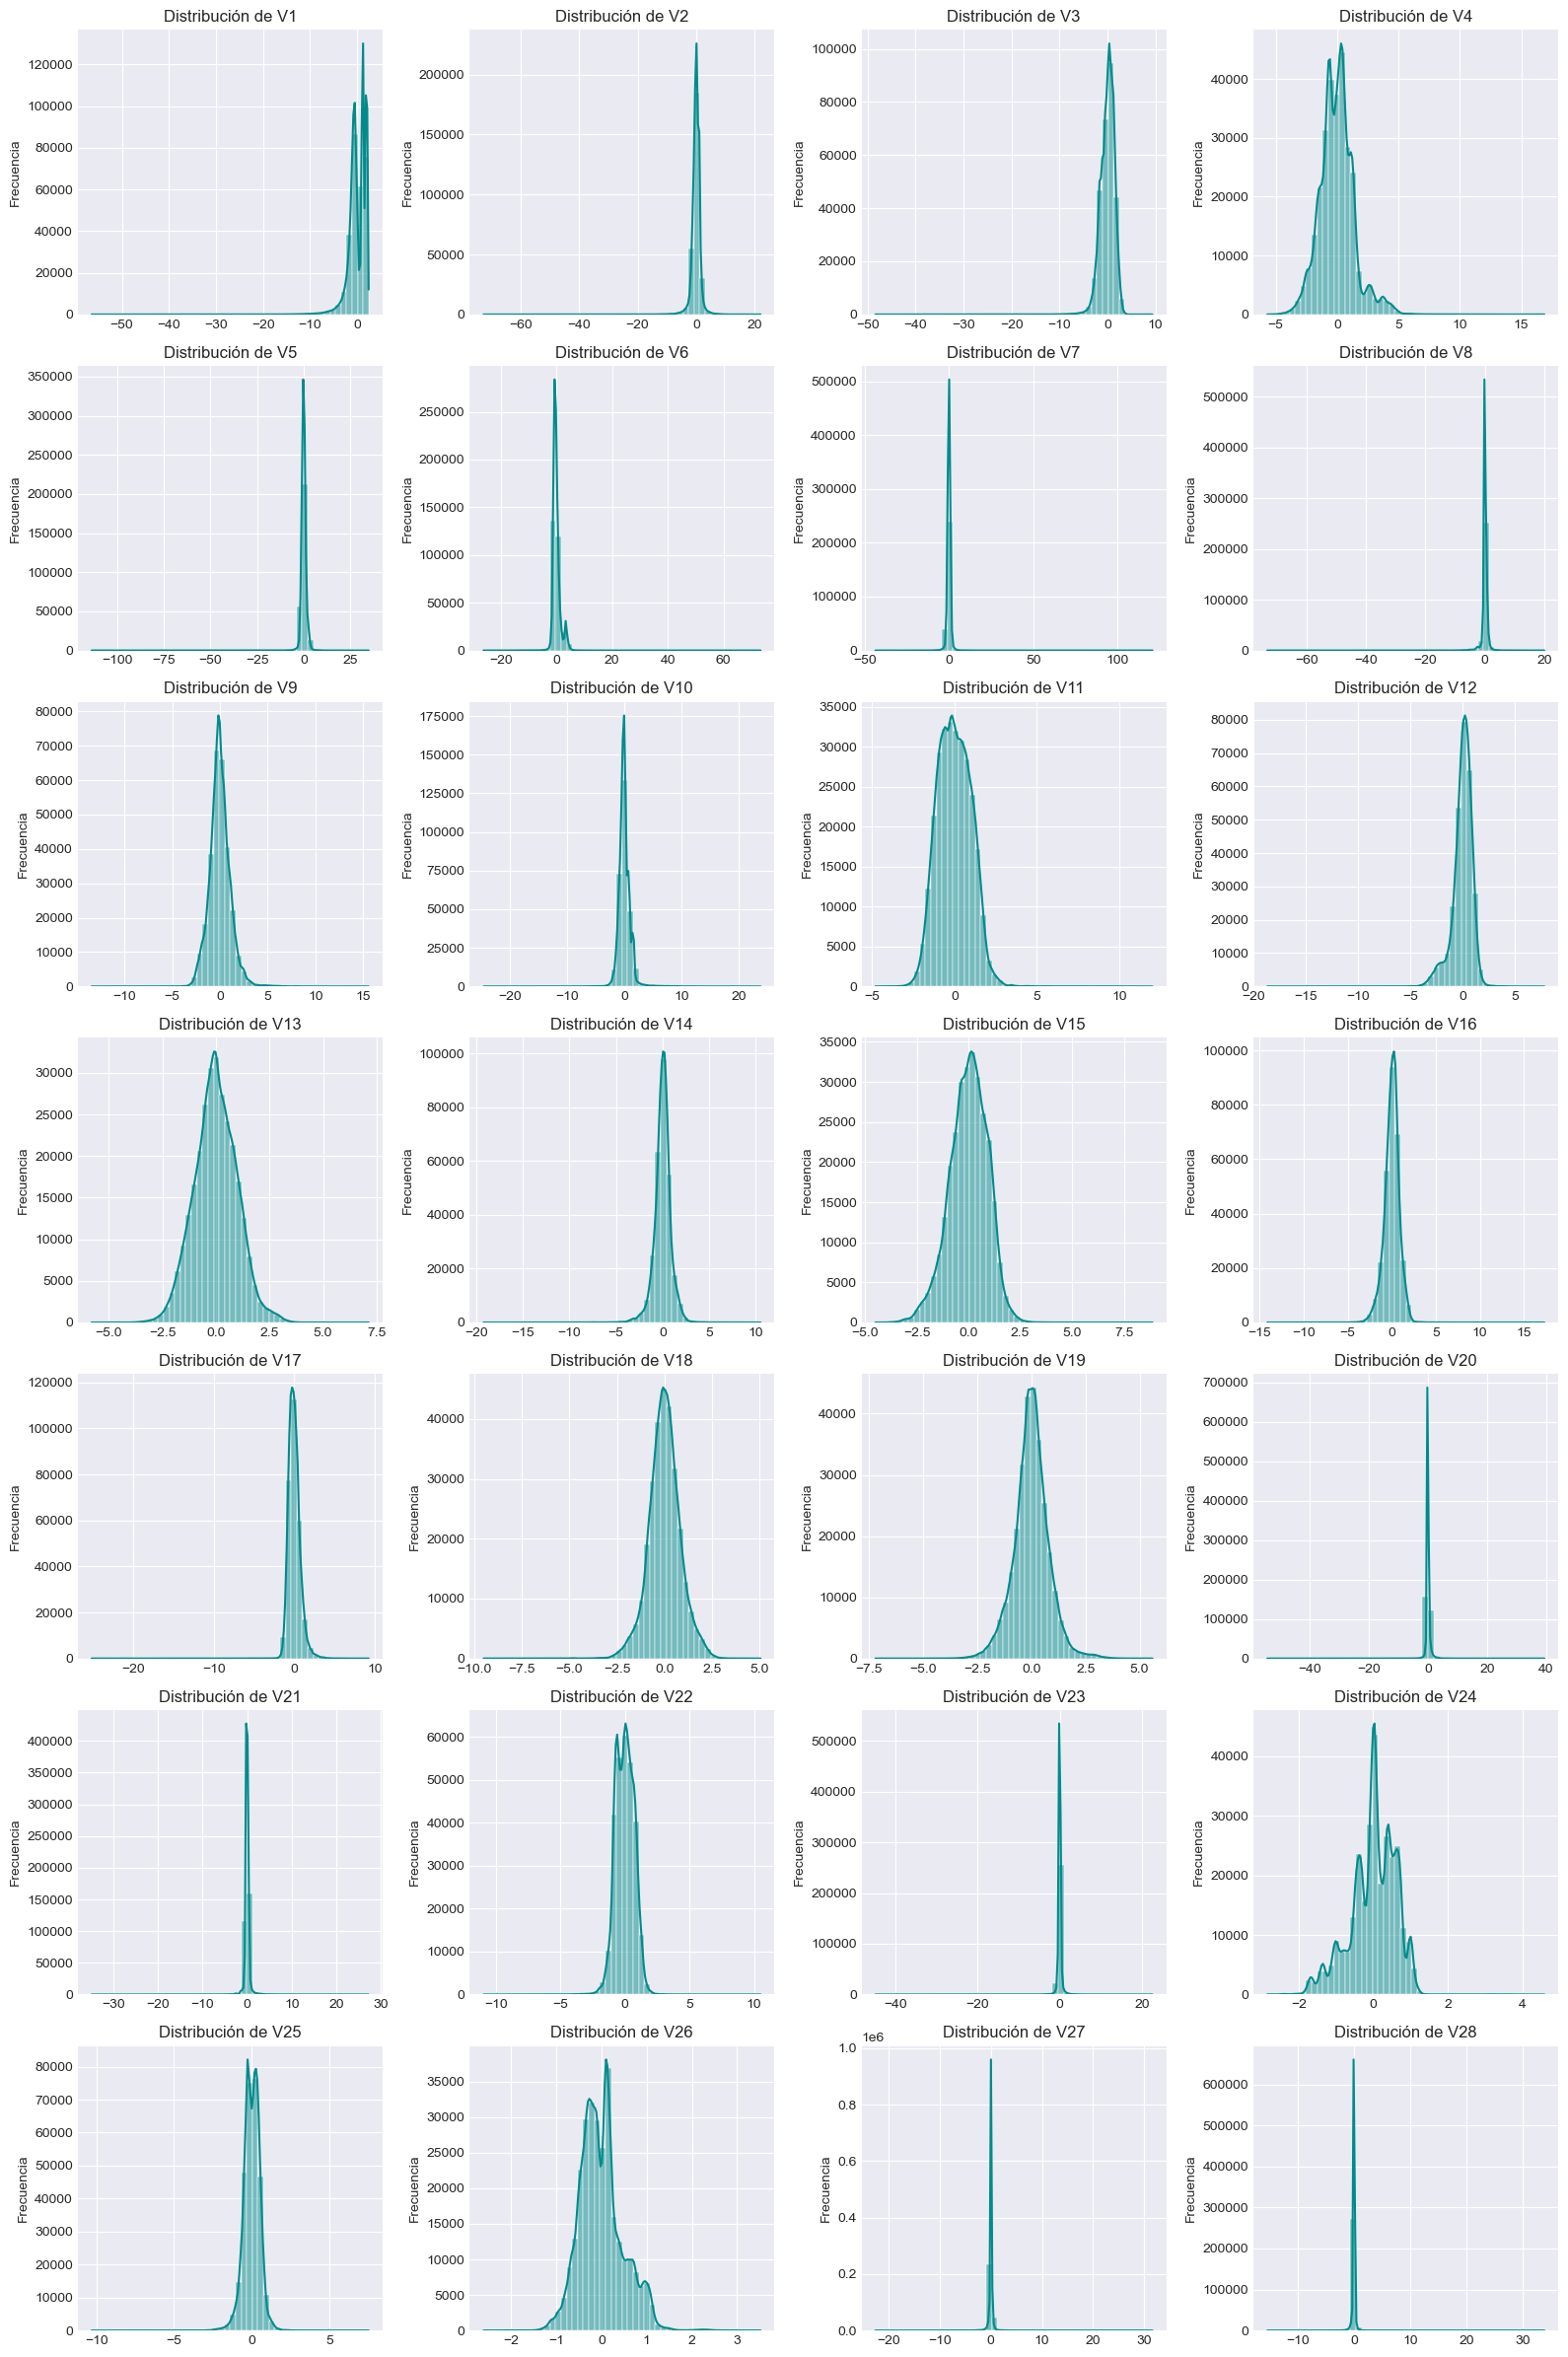

Histogramas generados.


In [ ]:
# 6. Vistazo a las Características PCA (V1-V28)
# Estas características son anónimas y resultado de PCA, por lo que su interpretación directa es limitada. Podemos ver sus distribuciones generales.

if df is not None:
    # Seleccionar las columnas V1 a V28
    v_features = [f'V{i}' for i in range(1, 29)]
    
    # Crear la figura y la cuadrícula de ejes (7 filas, 4 columnas)
    fig, axes = plt.subplots(7, 4, figsize=(16, 24)) # Ajusta figsize según necesites
    
    # Aplanar el array de ejes para iterar fácilmente
    axes = axes.flatten()
    
    print("Generando histogramas para V1-V28...")
    
    # Iterar sobre las características V y los ejes para graficar
    for i, col in enumerate(v_features):
        ax = axes[i] # Eje actual
        sns.histplot(df[col], bins=50, kde=True, ax=ax, color='darkcyan')
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('') # Opcional: quitar etiquetas x para no saturar
        ax.set_ylabel('Frecuencia')
        
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
        
    # Mostrar la figura completa
    plt.show()
    print("Histogramas generados.")

else:
    print("El DataFrame no se cargó. No se pueden generar los gráficos.")

**Observación Características PCA:** 

- Centradas en Cero: Como era de esperar para características resultantes de un Análisis de Componentes Principales (PCA) aplicado a datos posiblemente estandarizados, la gran mayoría de estas distribuciones están centradas alrededor del valor cero.

- Forma Aproximadamente Normal: Muchas de las distribuciones (por ejemplo, V10, V11, V12, V14, V16, V17, entre otras) se asemejan bastante a una distribución normal o Gaussiana (forma de campana), aunque con diferentes varianzas (anchuras).

- Variaciones en Varianza/Forma: Se aprecian diferencias en la dispersión (varianza) y la forma exacta:
    1. Algunas son más "picudas" o concentradas alrededor de cero (ej. V8, V20, V22, V26).
    2. Otras son un poco más anchas o con colas ligeramente más pesadas (ej. V1, V2, V4).
    3. Alguna puede tener una forma un poco más irregular (quizás V24).

- Ausencia de Asimetría Extrema: A diferencia de 'Amount', ninguna de estas características V parece tener la asimetría extrema que vimos antes.
 
 Dado que estas características ya parecen estar centradas en cero y la mayoría tienen formas relativamente simétricas (gracias al PCA), es posible que no requieran el mismo tipo de transformación drástica que 'Amount'. Sin embargo, dado que sus rangos y varianzas sí difieren entre ellas, aplicar un escalado (como StandardScaler, que las dejaría con media 0 y desviación estándar 1) sigue siendo una buena práctica recomendada antes de alimentar los datos a modelos sensibles a la escala como SVM y Redes Neuronales, para asegurar que todas las características contribuyan de forma equitativa basada en su información y no en su magnitud arbitraria. Los modelos basados en árboles (como Decision Tree o Random Forest) serían menos sensibles a este escalado.


#### 6.1 Box Plots de Características PCA (V1-V28) por Clase

Generando box plots para V1-V28 por Clase...


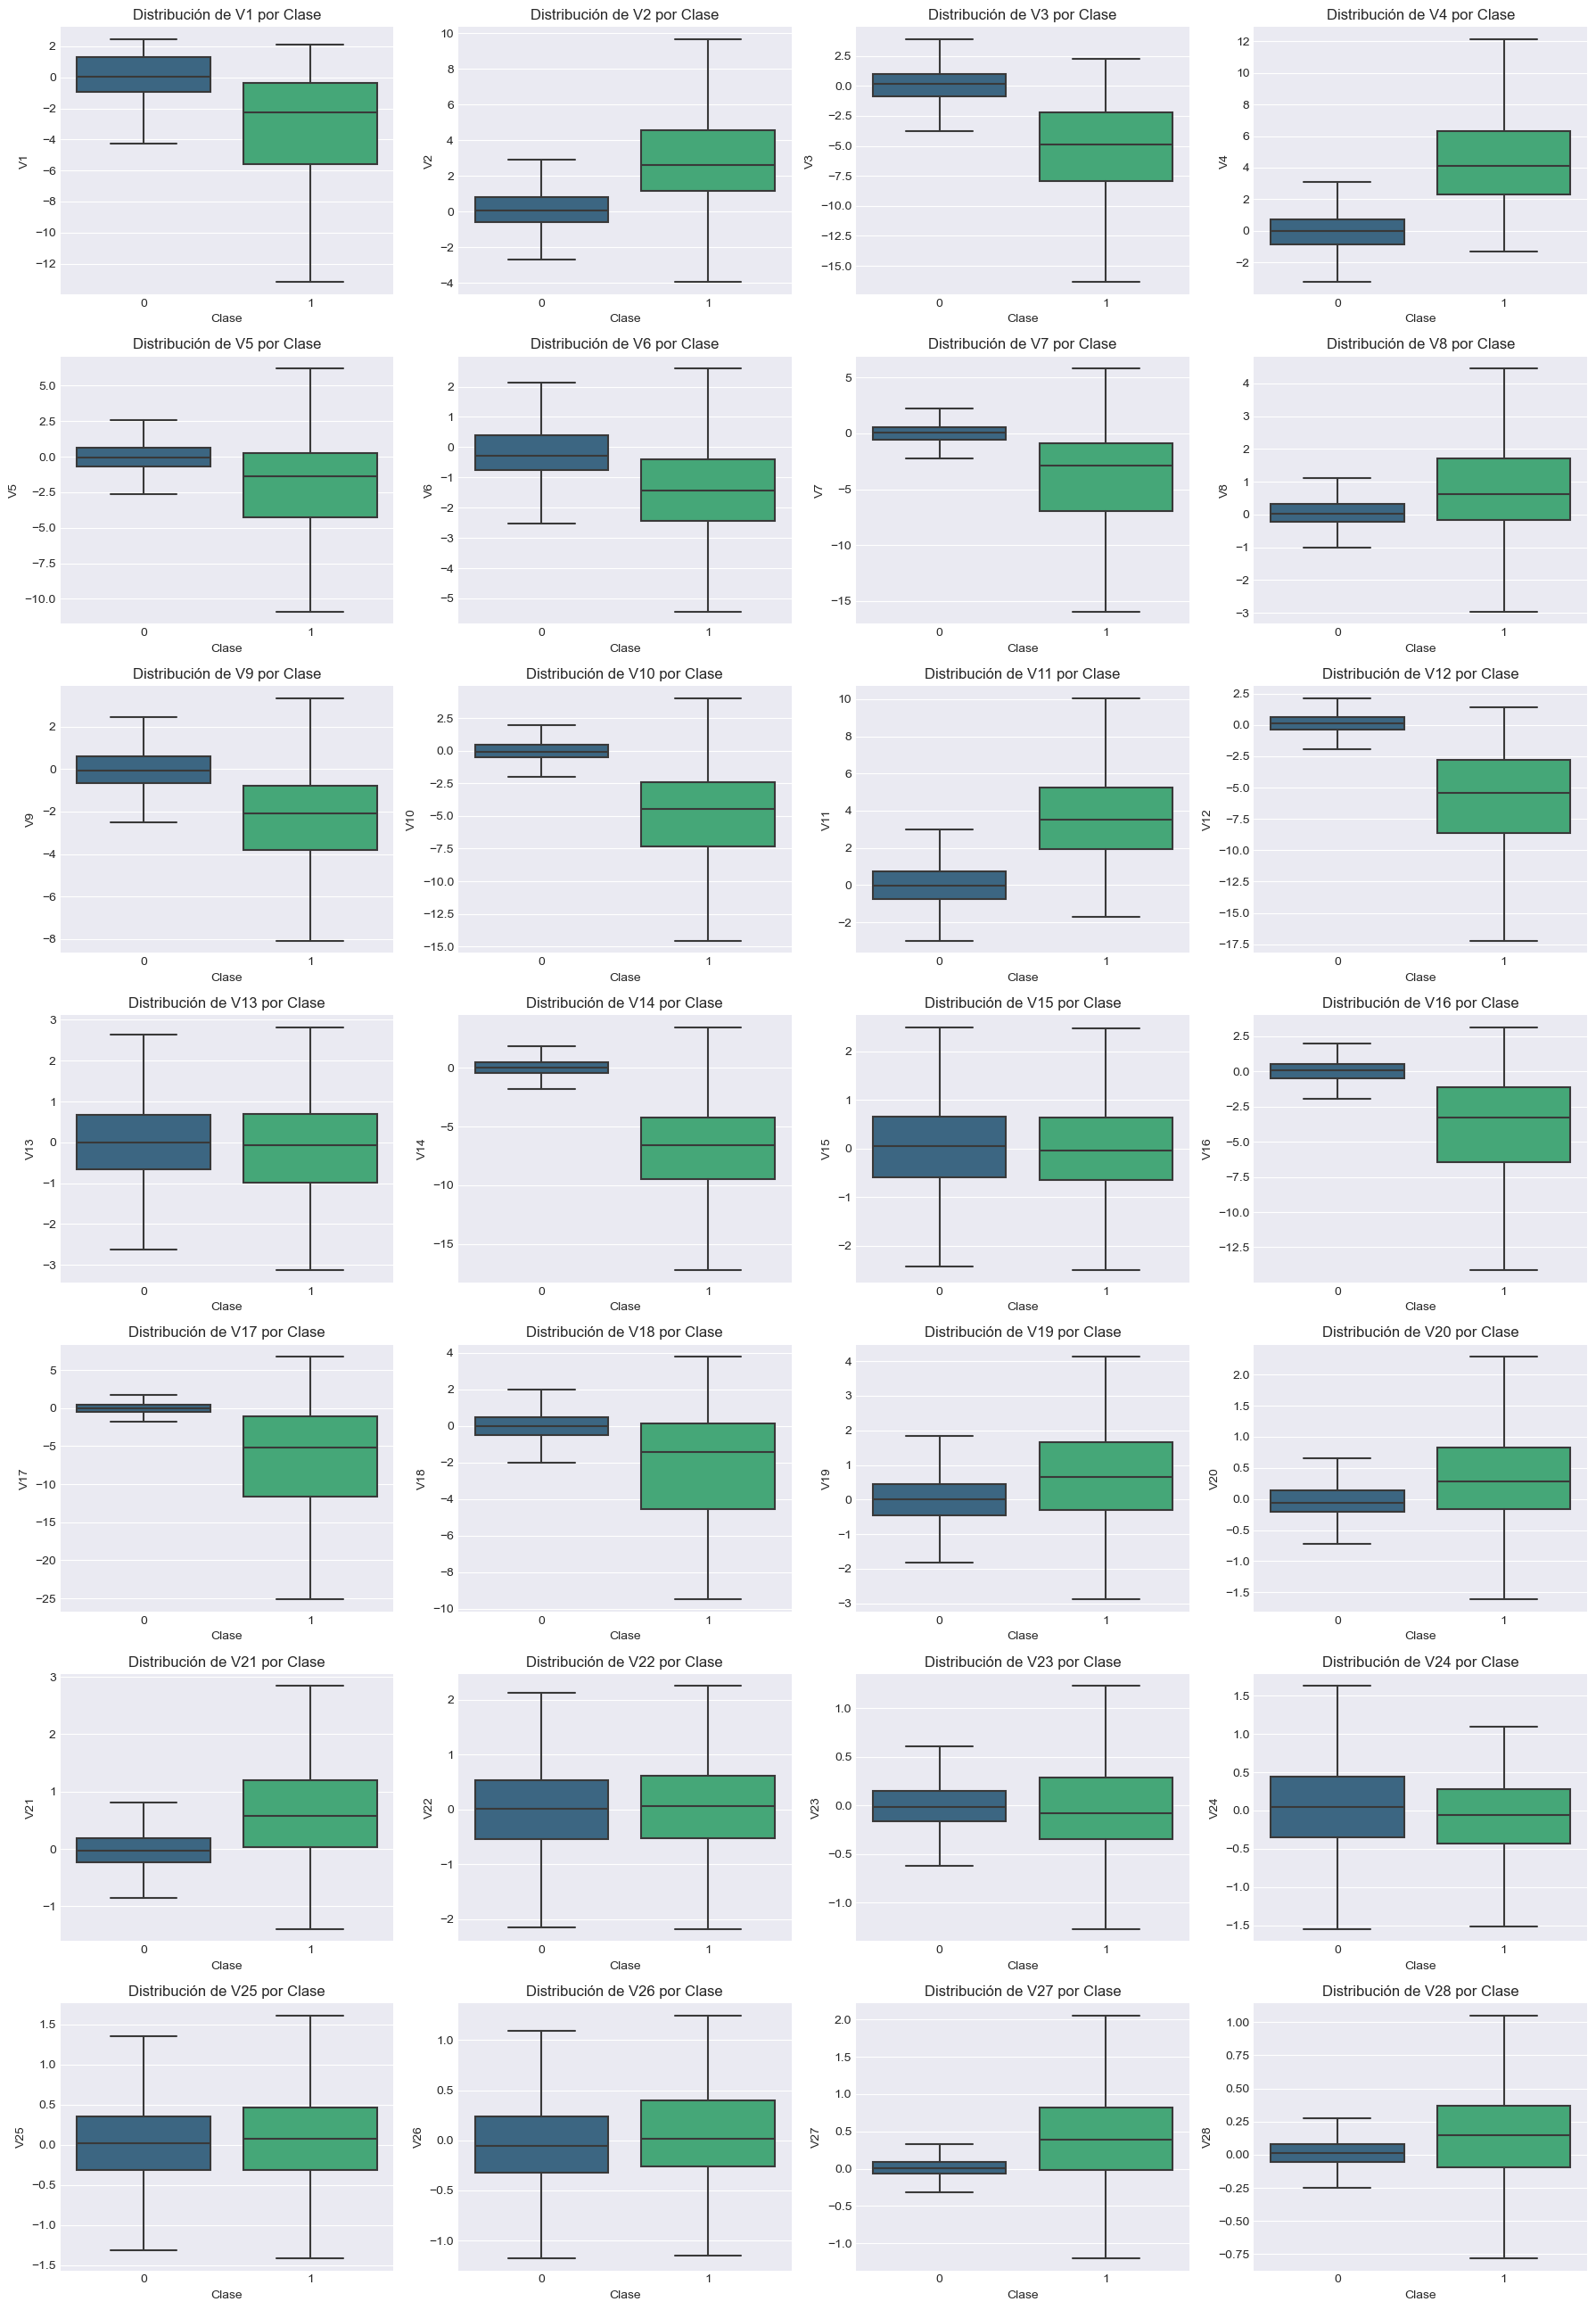

Box plots generados.


In [ ]:
# 6.1 Box Plots de Características PCA (V1-V28) por Clase
# 
# Visualizamos la distribución de cada característica V para la Clase 0 (Legítima) y la Clase 1 (Fraude) usando diagramas de caja (box plots). 
# Esto nos ayuda a identificar qué características muestran diferencias notables entre las dos clases.
# Usaremos `showfliers=False` para ocultar los outliers individuales y centrarnos en la comparación de las distribuciones principales (mediana, IQR).

if df is not None:
    # Seleccionar las columnas V1 a V28
    v_features = [f'V{i}' for i in range(1, 29)]
    
    # Crear la figura y la cuadrícula de ejes (7 filas, 4 columnas)
    fig, axes = plt.subplots(7, 4, figsize=(18, 26)) # Ajusta figsize según necesites
    
    # Aplanar el array de ejes para iterar fácilmente
    axes = axes.flatten()
    
    print("Generando box plots para V1-V28 por Clase...")
    
    # Iterar sobre las características V y los ejes para graficar
    for i, col in enumerate(v_features):
        if i < len(axes): # Asegurar que no intentamos acceder a un eje inexistente
            ax = axes[i] # Eje actual
            # Usar boxplot de seaborn, separando por 'Class'
            sns.boxplot(x='Class', y=col, data=df, ax=ax, showfliers=False, palette='viridis') # showfliers=False recomendado
            ax.set_title(f'Distribución de {col} por Clase')
            ax.set_xlabel('Clase') # Etiqueta X: Clase (0 vs 1)
            ax.set_ylabel(col) # Etiqueta Y: Nombre de la característica V
        
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
        
    # Mostrar la figura completa
    plt.show()
    print("Box plots generados.")

else:
    print("El DataFrame 'df' no está definido o no se cargó correctamente.")

**Observaciones:** 

- Diferencias Claras en Varias Características: Muchas de las características V muestran distribuciones visiblemente diferentes entre la Clase 0 y la Clase 1. Esto es una excelente señal, ya que indica que estas características contienen información útil para distinguir el fraude.

- Diferencias en Mediana y Posición: En varias características, la mediana (la línea dentro de la caja) y/o la posición general de la caja (el rango intercuartílico) son notablemente distintas entre las dos clases. Por ejemplo:
    - Mediana Más Baja en Fraude (Clase 1): Características como V10, V12, V14, V16, V17 parecen tener medianas consistentemente más bajas para las transacciones fraudulentas.
    - Mediana Más Alta en Fraude (Clase 1): Características como V4 y V11 parecen tener medianas más altas para las transacciones fraudulentas.

- Características Menos Discriminatorias: Por otro lado, hay características donde las distribuciones para ambas clases son muy similares, con cajas y medianas casi superpuestas (ej. V8, V13, V15, V19, V20, V22, V23, V24, V25, V26, V27, V28). Estas características podrían ser, individualmente, menos útiles para la detección.

Las características que muestran una separación clara entre las distribuciones de la Clase 0 y la Clase 1 (especialmente V4, V10, V11, V12, V14, V16, V17) son candidatas fuertes a ser buenos predictores para los modelos de Machine Learning. Los algoritmos podrán explotar estas diferencias para clasificar las transacciones.

### 7. Preprocesamiento: Escalado de 'Time' y 'Amount'

In [60]:
# 7. Preprocesamiento: Escalado de 'Time' y 'Amount'
# Creamos un nuevo DataFrame `df_scaled` con estas columnas escaladas.

from sklearn.preprocessing import StandardScaler, RobustScaler

# Verificar si df existe
if df is not None:
    # Crear una copia para no modificar el df original durante EDA
    df_scaled = df.copy() 

    # Escalar 'Amount'
    # RobustScaler es menos sensible a outliers que StandardScaler
    # scaler_amount = StandardScaler() 
    scaler_amount = RobustScaler()
    df_scaled['Amount'] = scaler_amount.fit_transform(df_scaled['Amount'].values.reshape(-1, 1))
    
    # Escalar 'Time'
    # scaler_time = StandardScaler()
    scaler_time = RobustScaler()
    df_scaled['Time'] = scaler_time.fit_transform(df_scaled['Time'].values.reshape(-1, 1))

    print("Primeras filas del DataFrame con 'Time' y 'Amount' escalados:")
    try:
        display(df_scaled.head())
    except NameError:
        print(df_scaled.head())

    print("\nEstadísticas descriptivas para 'Time' y 'Amount' escalados:")
    try:
        display(df_scaled[['Time', 'Amount']].describe())
    except NameError:
        print(df_scaled[['Time', 'Amount']].describe())
        
    print("\nEscalado completado. El DataFrame 'df_scaled' está listo para la división.")
else:
    print("El DataFrame 'df' no está definido.")

Primeras filas del DataFrame con 'Time' y 'Amount' escalados:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0



Estadísticas descriptivas para 'Time' y 'Amount' escalados:


,Time,Amount
count,283726.000000,283726.000000
mean,0.118912,0.924387
std,0.557988,3.482123
min,-0.995290,-0.305938
25%,-0.358286,-0.228063
50%,0.000000,0.000000
75%,0.641714,0.771937
max,1.035329,356.962314



Escalado completado. El DataFrame 'df_scaled' está listo para la división.


### 8. División de Datos (Entrenamiento y Prueba)

In [61]:
# 8. División de Datos (Entrenamiento y Prueba)

# Dividimos el dataset escalado (`df_scaled`) en conjuntos de entrenamiento y prueba.
# Es crucial usar `stratify=y` para mantener la proporción de clases en ambos conjuntos debido al gran desbalanceo.

from sklearn.model_selection import train_test_split

# Verificar si df_scaled existe (creado en el paso 7 de escalado)
if df_scaled is not None:
    # Separar características (X) y variable objetivo (y)
    try:
        X = df_scaled.drop('Class', axis=1)
        y = df_scaled['Class']

        # Realizar la división estratificada (ej. 80% entrenamiento, 20% prueba)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,     # Proporción para el conjunto de prueba (20%)
            random_state=42,   # Semilla para reproducibilidad
            stratify=y         # ¡Muy importante para mantener proporción de clases!
        )

        # Verificar las dimensiones de los conjuntos resultantes
        print("Dimensiones de los conjuntos de datos:")
        print(f"X_train: {X_train.shape}")
        print(f"y_train: {y_train.shape}")
        print(f"X_test: {X_test.shape}")
        print(f"y_test: {y_test.shape}")

        # Verificar la proporción de clases en entrenamiento y prueba
        print("\nProporción de Fraude en set de Entrenamiento:")
        # Asegurarse de que y_train no está vacío antes de calcular
        if len(y_train) > 0:
             print(f"{ (y_train.sum() / len(y_train)) * 100:.4f}%")
        else:
             print("y_train está vacío.")

        print("\nProporción de Fraude en set de Prueba:")
         # Asegurarse de que y_test no está vacío antes de calcular
        if len(y_test) > 0:
             print(f"{ (y_test.sum() / len(y_test)) * 100:.4f}%")
        else:
             print("y_test está vacío.")

        print("\n¡División de datos completada exitosamente!")

    except KeyError as e:
        print(f"Error: No se encontró la columna {e} en df_scaled.")
        print("Verifica que df_scaled se generó correctamente en el paso anterior.")
    except Exception as e:
        print(f"Ocurrió un error durante la división de datos: {e}")

else:
    print("El DataFrame 'df_scaled' no está definido.")
    print("Asegúrate de haber ejecutado la celda de escalado (Paso 7) primero.")

Dimensiones de los conjuntos de datos:
X_train: (226980, 30)
y_train: (226980,)
X_test: (56746, 30)
y_test: (56746,)

Proporción de Fraude en set de Entrenamiento:
0.1665%

Proporción de Fraude en set de Prueba:
0.1674%

¡División de datos completada exitosamente!


Ahora tenemos nuestro conjunto de prueba (X_test, y_test) guardado y no debemos tocarlo más hasta la evaluación final.

Nuestro siguiente objetivo es trabajar únicamente con el conjunto de entrenamiento (X_train, y_train) para abordar el severo desbalanceo antes de entrenar los modelos, usando SMOTE, GANs o Undersampling.

### 9. Manejo del Desbalanceo: Aplicación de SMOTE (al Conjunto de Entrenamiento)

In [62]:
# 9. Manejo del Desbalanceo: Aplicación de SMOTE (al Conjunto de Entrenamiento)

# Aplicamos SMOTE para sobremuestrear la clase minoritaria (fraude) y obtener un conjunto de entrenamiento balanceado.
# ¡Importante! SMOTE (y cualquier técnica de remuestreo) se aplica **SOLO** al conjunto de entrenamiento (`X_train`, `y_train`).

# Necesitas tener instalada la librería: pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import collections # Para verificar el conteo de clases después de SMOTE

# Verificar que X_train y y_train existen
if 'X_train' in locals() and 'y_train' in locals():
    print(f"Distribución original de clases en entrenamiento: {collections.Counter(y_train)}")
    
    # Instanciar SMOTE
    # random_state para reproducibilidad
    smote = SMOTE(random_state=42) 
    
    print("\nAplicando SMOTE al conjunto de entrenamiento...")
    # Aplicar SMOTE - fit_resample devuelve los nuevos X e y balanceados
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    print("SMOTE completado.")
    print(f"\nNuevo shape de X_train_smote: {X_train_smote.shape}")
    print(f"Nuevo shape de y_train_smote: {y_train_smote.shape}")
    
    # Verificar la nueva distribución de clases
    print(f"\nNueva distribución de clases en entrenamiento (después de SMOTE): {collections.Counter(y_train_smote)}")
    
    print("\nAhora tenemos 'X_train_smote' y 'y_train_smote' listos para entrenar modelos.")

else:
    print("Las variables X_train o y_train no están definidas.")
    print("Asegúrate de haber ejecutado la celda de división de datos (Paso 8) primero.")

Distribución original de clases en entrenamiento: Counter({0: 226602, 1: 378})

Aplicando SMOTE al conjunto de entrenamiento...
SMOTE completado.

Nuevo shape de X_train_smote: (453204, 30)
Nuevo shape de y_train_smote: (453204,)

Nueva distribución de clases en entrenamiento (después de SMOTE): Counter({0: 226602, 1: 226602})

Ahora tenemos 'X_train_smote' y 'y_train_smote' listos para entrenar modelos.


### 10. Implementación y Evaluación del Modelo: Árbol de Decisión (con SMOTE)

Entrenando Árbol de Decisión con datos SMOTE...
Entrenamiento completado.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas.

--- Evaluación del Árbol de Decisión (entrenado con SMOTE) ---

Matriz de Confusión:
[[56547   104]
 [   29    66]]


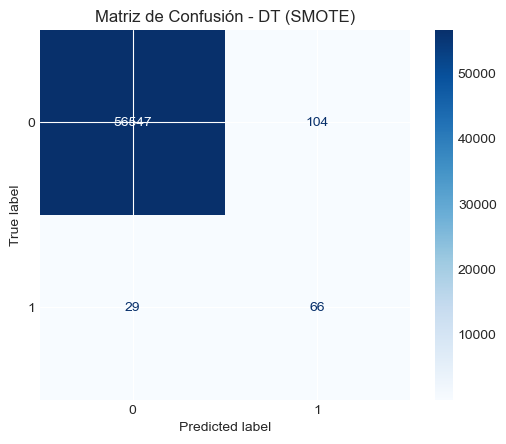


Reporte de Clasificación:
              precision    recall  f1-score   support

Legítima (0)       1.00      1.00      1.00     56651
  Fraude (1)       0.39      0.69      0.50        95

    accuracy                           1.00     56746
   macro avg       0.69      0.85      0.75     56746
weighted avg       1.00      1.00      1.00     56746

AUC ROC: 0.8465
AUC Precision-Recall (AUC PR): 0.5417


In [63]:
# 10. Implementación y Evaluación del Modelo: Árbol de Decisión (con SMOTE)

# Entrenamos un modelo de Árbol de Decisión utilizando los datos de entrenamiento balanceados por SMOTE 
# (`X_train_smote`, `y_train_smote`) y lo evaluamos en el conjunto de prueba original (`X_test`, `y_test`).

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_recall_curve, 
    auc,
    ConfusionMatrixDisplay # Para visualizar la matriz de confusión
)

# Verificar que los datos existen
if 'X_train_smote' in locals() and 'y_train_smote' in locals() and 'X_test' in locals() and 'y_test' in locals():
    
    print("Entrenando Árbol de Decisión con datos SMOTE...")
    # 1. Instanciar el modelo
    # Usamos random_state para reproducibilidad
    dt_smote = DecisionTreeClassifier(random_state=42) 
    
    # 2. Entrenar el modelo
    dt_smote.fit(X_train_smote, y_train_smote)
    print("Entrenamiento completado.")
    
    # 3. Realizar predicciones en el conjunto de prueba (X_test)
    print("\nRealizando predicciones en el conjunto de prueba...")
    y_pred_dt_smote = dt_smote.predict(X_test)
    # Obtener probabilidades para la clase positiva (necesario para AUCs y PR curve)
    y_prob_dt_smote = dt_smote.predict_proba(X_test)[:, 1]
    print("Predicciones completadas.")
    
    # 4. Evaluar el modelo
    print("\n--- Evaluación del Árbol de Decisión (entrenado con SMOTE) ---")
    
    # Matriz de Confusión
    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred_dt_smote)
    print(cm)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión - DT (SMOTE)')
    plt.show()
    
    # Reporte de Clasificación (Precision, Recall, F1-score)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_dt_smote, target_names=['Legítima (0)', 'Fraude (1)']))
    
    # AUC ROC
    auc_roc = roc_auc_score(y_test, y_prob_dt_smote)
    print(f"AUC ROC: {auc_roc:.4f}")
    
    # AUC PR (Precision-Recall)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_dt_smote)
    auc_pr = auc(recall, precision)
    print(f"AUC Precision-Recall (AUC PR): {auc_pr:.4f}")

else:
    print("No se encontraron los DataFrames/Series de entrenamiento o prueba.")
    print("Asegúrate de haber ejecutado las celdas de división y SMOTE primero.")

__Interpretación de los Resultados DT:__

1. Matriz de Confusión: `[[56547, 104], [ 29, 66]]`
    * TN (Verdaderos Negativos): 56547 transacciones legítimas fueron correctamente clasificadas como legítimas. 
    * FP (Falsos Positivos): 104 transacciones legítimas fueron incorrectamente clasificadas como fraude. Estas son las "falsas alarmas".
    * FN (Falsos Negativos): 29 transacciones fraudulentas no fueron detectadas (se clasificaron como legítimas). (Estos son los fraudes perdidos, lo cual es costoso)
    * TP (Verdaderos Positivos): 66 transacciones fraudulentas fueron correctamente detectadas.

2. Reporte de Clasificación:
    * Clase Legítima (0): Las métricas son casi perfectas (Precision, Recall, F1 = 1.00). El modelo identifica muy bien las transacciones normales.
    * Clase Fraude (1): Aquí está lo interesante:
      * Precision = 0.39: Baja. Significa que de todas las alertas de fraude que generó el modelo (104 FP + 66 TP = 170), solo el 39% eran fraudes reales (66 / 170). El 61% restante eran falsas alarmas. Esto puede ser problemático en la práctica (costo de investigar, molestar a clientes).
      * Recall = 0.69: Decente/Moderado. Significa que el modelo logró detectar el 69% de todos los fraudes presentes en el conjunto de prueba (66 TP / (66 TP + 29 FN)). Se perdió un 31% de los fraudes.
    * F1-score = 0.50: Es la media armónica, un balance entre la baja precisión y el recall moderado.
    * Accuracy = 1.00 (aprox): Como esperábamos, es muy alta pero engañosa debido al desbalanceo. No refleja bien el rendimiento en la detección de fraude.

3. Métricas AUC:
  * AUC ROC = 0.8465: Un valor bastante decente (mucho mejor que 0.5), indica que el modelo tiene una buena capacidad general para distinguir entre las clases si ajustáramos el umbral de decisión.
  * AUC PR = 0.5417: Esta métrica, más sensible al desbalanceo, muestra un rendimiento moderado. Hay un espacio considerable para mejorar la combinación de precisión y recall simultáneamente. Un modelo ideal tendría un AUC PR cercano a 1.

__Conclusión Intermedia:__

El Árbol de Decisión entrenado con SMOTE consigue detectar una parte importante de los fraudes (buen Recall), lo cual es positivo y probablemente una mejora respecto a no usar SMOTE. Sin embargo, lo hace a costa de generar una cantidad considerable de falsas alarmas (baja Precisión). Este es un compromiso (trade-off) clásico en detección de fraude.

Este resultado nos sirve como una línea base (baseline). Ahora podemos ver si los otros modelos (SVM, NN) o el enfoque con GANs pueden mejorar este balance, idealmente aumentando el Recall sin sacrificar tanto la Precisión, o viceversa, y obteniendo un mejor AUC PR.

### 11. Implementación y Evaluación del Modelo: SVM (con SMOTE)

Entrenando SVM (Kernel RBF) con datos SMOTE...
Esto puede tardar varios minutos...
Entrenamiento completado.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas.

--- Evaluación del SVM (entrenado con SMOTE) ---

Matriz de Confusión:
[[55935   716]
 [   16    79]]


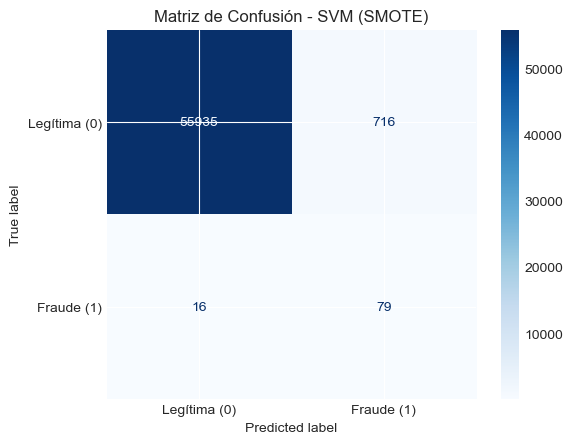


Reporte de Clasificación:
              precision    recall  f1-score   support

Legítima (0)       1.00      0.99      0.99     56651
  Fraude (1)       0.10      0.83      0.18        95

    accuracy                           0.99     56746
   macro avg       0.55      0.91      0.59     56746
weighted avg       1.00      0.99      0.99     56746

AUC ROC: 0.9495
AUC Precision-Recall (AUC PR): 0.6256


In [64]:
# 11. Implementación y Evaluación del Modelo: SVM (con SMOTE)

# Entrenamos un modelo Support Vector Machine (usando el kernel RBF por defecto) con los datos de entrenamiento balanceados por SMOTE 
# y lo evaluamos en el conjunto de prueba original.
# **Advertencia:** ¡Este entrenamiento puede ser computacionalmente costoso y tardar bastante tiempo!

from sklearn.svm import SVC
# Las métricas ya deberían estar importadas de la celda anterior
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# Verificar que los datos existen
if 'X_train_smote' in locals() and 'y_train_smote' in locals() and 'X_test' in locals() and 'y_test' in locals():
    
    print("Entrenando SVM (Kernel RBF) con datos SMOTE...")
    print("Esto puede tardar varios minutos...")
    # 1. Instanciar el modelo
    # Usamos kernel='rbf' (por defecto) y probability=True para poder calcular AUCs
    svm_smote = SVC(kernel='rbf', probability=True, random_state=42) 
    
    # 2. Entrenar el modelo
    svm_smote.fit(X_train_smote, y_train_smote)
    print("Entrenamiento completado.")
    
    # 3. Realizar predicciones en el conjunto de prueba (X_test)
    print("\nRealizando predicciones en el conjunto de prueba...")
    y_pred_svm_smote = svm_smote.predict(X_test)
    y_prob_svm_smote = svm_smote.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (1)
    print("Predicciones completadas.")
    
    # 4. Evaluar el modelo
    print("\n--- Evaluación del SVM (entrenado con SMOTE) ---")
    
    # Matriz de Confusión
    print("\nMatriz de Confusión:")
    cm_svm = confusion_matrix(y_test, y_pred_svm_smote)
    print(cm_svm)
    # Visualizar la matriz de confusión
    disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Legítima (0)', 'Fraude (1)'])
    disp_svm.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión - SVM (SMOTE)')
    plt.show()
    
    # Reporte de Clasificación (Precision, Recall, F1-score)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_svm_smote, target_names=['Legítima (0)', 'Fraude (1)']))
    
    # AUC ROC
    auc_roc_svm = roc_auc_score(y_test, y_prob_svm_smote)
    print(f"AUC ROC: {auc_roc_svm:.4f}")
    
    # AUC PR (Precision-Recall)
    precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm_smote)
    auc_pr_svm = auc(recall_svm, precision_svm)
    print(f"AUC Precision-Recall (AUC PR): {auc_pr_svm:.4f}")

else:
    print("No se encontraron los DataFrames/Series de entrenamiento o prueba generados por SMOTE o train_test_split.")
    print("Asegúrate de haber ejecutado las celdas anteriores primero.")

__Interpretación de Resultados SVM:__

1. Matriz de Confusión: `[[55935, 716], [ 16, 79]]`
   * TN: 55935 (Muy bueno, similar a DT).
   * FP: 716 (Mucho más alto que los 104 del DT). Estas son las falsas alarmas.
   * FN: 16 (Significativamente menor que los 29 del DT). El SVM perdió muchos menos fraudes.
   * TP: 79 (Más alto que los 66 del DT). Detectó más fraudes reales.

2. Reporte de Clasificación:
   * Clase Fraude (1):
     * Precision = 0.10: Extremadamente baja. Mucho peor que el 0.39 del DT. Solo el 10% de las alertas de fraude del SVM son correctas; el 90% son falsas alarmas.
    Recall = 0.83: Significativamente mejor que el 0.69 del DT. (El SVM detectó el 83% de todos los fraudes)
     * F1-score = 0.18: Muy bajo, reflejando el pésimo balance entre la precisión casi nula y el buen recall. Peor que el 0.50 del DT en este balance específico.

   * Métricas AUC:
     * AUC ROC = 0.9495: Bastante bueno, y notablemente mejor que el 0.8465 del DT. Indica que las probabilidades generadas por el SVM separan mejor las clases en general que las del DT.
     * AUC PR = 0.6256: Moderadamente bueno, y también mejor que el 0.5417 del DT. Confirma que el SVM ofrece un mejor compromiso potencial entre precisión y recall a través de diferentes umbrales.

3. Comparación SVM vs. Árbol de Decisión (Ambos con SMOTE):
   * Velocidad: El DT fue muchísimo más rápido (47 segundos) que el SVM (345 minutos).
   * Detección de Fraude (Recall): El SVM es claramente superior, encontrando un 83% de los fraudes frente al 69% del DT.
   * Falsas Alarmas (Precisión): El SVM es mucho peor, generando una cantidad masiva de falsas alarmas (Precisión de 0.10) comparado con el DT (Precisión de 0.39).
   * Balance (F1): El DT muestra un mejor balance F1 con el umbral por defecto (0.50 vs 0.18).
   * Capacidad Discriminatoria (AUCs): El SVM muestra una capacidad discriminatoria subyacente superior (AUC ROC y AUC PR más altos). Esto sugiere que, aunque el umbral de decisión por defecto (0.5) da malos resultados de precisión para SVM, podríamos encontrar un umbral diferente usando las probabilidades del SVM (y_prob_svm_smote) que ofrezca un mejor balance P/R que el DT.


| Métrica             | Árbol de Decisión (DT) | Support Vector Machine (SVM) | Comparación                             |
| :------------------ | :----------------------- | :--------------------------- | :-------------------------------------- |
| **Tiempo Entrenamiento** | Rápido                   | Muy Lento (345 min)          | SVM muchísimo más lento                 |
| **Recall (Fraude)** | 0.69                     | 0.83                         | SVM detecta más fraudes                 |
| **Precision (Fraude)**| 0.39                     | 0.10                         | SVM genera muchas más falsas alarmas    |
| **F1-Score (Fraude)** | 0.50                     | 0.18                         | DT tiene mejor balance P/R (default)    |
| **Falsos Positivos (FP)**| 104                      | 716                          | SVM genera muchos más FP              |
| **Falsos Negativos (FN)**| 29                       | 16                           | SVM pierde menos fraudes                |
| **AUC ROC** | 0.8465                   | 0.9495                       | SVM discrimina mejor (general)          |
| **AUC PR** | 0.5417                   | 0.6256                       | SVM mejor trade-off P/R (general) |


__Conclusión Intermedia:__

El SVM (con parámetros por defecto y kernel RBF) entrenado con SMOTE es muy bueno encontrando fraudes (alto recall) pero a un costo muy alto de falsas alarmas (baja precisión) y tiempo de cómputo. Sus puntuaciones AUC sugieren que es un modelo potencialmente más potente que el DT si se ajusta el umbral de decisión.

### 12. Implementación y Evaluación del Modelo: Red Neuronal (MLP con SMOTE)

Entrenando Red Neuronal (MLP) con datos SMOTE...
Iteration 1, loss = 0.03734855
Validation score: 0.998102
Iteration 2, loss = 0.00595132
Validation score: 0.999206
Iteration 3, loss = 0.00379937
Validation score: 0.999581
Iteration 4, loss = 0.00282780
Validation score: 0.999470
Iteration 5, loss = 0.00213730
Validation score: 0.999537
Iteration 6, loss = 0.00173599
Validation score: 0.999206
Iteration 7, loss = 0.00177462
Validation score: 0.999294
Iteration 8, loss = 0.00134440
Validation score: 0.997485
Iteration 9, loss = 0.00141374
Validation score: 0.999801
Iteration 10, loss = 0.00137163
Validation score: 0.999581
Iteration 11, loss = 0.00090190
Validation score: 0.999691
Iteration 12, loss = 0.00147337
Validation score: 0.999735
Iteration 13, loss = 0.00096700
Validation score: 0.999316
Iteration 14, loss = 0.00093140
Validation score: 0.999823
Iteration 15, loss = 0.00104359
Validation score: 0.999846
Iteration 16, loss = 0.00083146
Validation score: 0.999823
Iteration 17, lo

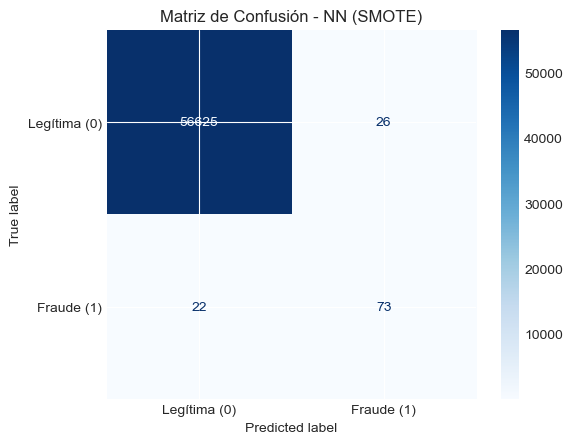


Reporte de Clasificación:
              precision    recall  f1-score   support

Legítima (0)       1.00      1.00      1.00     56651
  Fraude (1)       0.74      0.77      0.75        95

    accuracy                           1.00     56746
   macro avg       0.87      0.88      0.88     56746
weighted avg       1.00      1.00      1.00     56746

AUC ROC: 0.9446
AUC Precision-Recall (AUC PR): 0.7752


In [65]:
# 12. Implementación y Evaluación del Modelo: Red Neuronal (MLP con SMOTE)

# Entrenamos un Perceptrón Multicapa (MLP) usando los datos de entrenamiento balanceados por SMOTE 
# y lo evaluamos en el conjunto de prueba original.

from sklearn.neural_network import MLPClassifier
# Las métricas ya deberían estar importadas
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt 
import time # Para medir el tiempo

# Verificar que los datos existen
if 'X_train_smote' in locals() and 'y_train_smote' in locals() and 'X_test' in locals() and 'y_test' in locals():
    
    print("Entrenando Red Neuronal (MLP) con datos SMOTE...")
    
    # Medir tiempo de inicio
    start_time_nn = time.time()
    
    # 1. Instanciar el modelo
    # Definimos una arquitectura simple: 2 capas ocultas con 64 y 32 neuronas.
    # Usamos activación ReLU, optimizador Adam, y early stopping para evitar sobreajuste.
    nn_smote = MLPClassifier(
        hidden_layer_sizes=(64, 32),  # Arquitectura: 2 capas ocultas
        activation='relu',          # Función de activación común
        solver='adam',              # Optimizador eficiente
        alpha=0.0001,               # Regularización L2 (pequeña por defecto)
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=300,              # Aumentar épocas si no converge (default 200)
        shuffle=True,
        random_state=42,           # Para reproducibilidad
        early_stopping=True,       # Detiene el entrenamiento si no mejora en validación
        validation_fraction=0.1,   # Usa 10% de datos de entrenamiento para validación temprana
        n_iter_no_change=10,       # Número de iteraciones sin mejora para detenerse
        verbose=True               # Muestra el progreso del entrenamiento
    ) 
    
    # 2. Entrenar el modelo
    nn_smote.fit(X_train_smote, y_train_smote)
    
    # Medir tiempo de fin (opcional)
    end_time_nn = time.time()
    training_time_nn = end_time_nn - start_time_nn
    print(f"Entrenamiento completado en {training_time_nn:.2f} segundos.")
    
    # 3. Realizar predicciones en el conjunto de prueba (X_test)
    print("\nRealizando predicciones en el conjunto de prueba...")
    start_pred_time_nn = time.time()
    y_pred_nn_smote = nn_smote.predict(X_test)
    y_prob_nn_smote = nn_smote.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (1)
    end_pred_time_nn = time.time()
    prediction_time_nn = end_pred_time_nn - start_pred_time_nn
    print(f"Predicciones completadas en {prediction_time_nn:.2f} segundos.")
    
    # 4. Evaluar el modelo
    print("\n--- Evaluación de la Red Neuronal (entrenada con SMOTE) ---")
    
    # Matriz de Confusión
    print("\nMatriz de Confusión:")
    cm_nn = confusion_matrix(y_test, y_pred_nn_smote)
    print(cm_nn)
    # Visualizar la matriz de confusión
    disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['Legítima (0)', 'Fraude (1)'])
    disp_nn.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión - NN (SMOTE)')
    plt.show()
    
    # Reporte de Clasificación (Precision, Recall, F1-score)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_nn_smote, target_names=['Legítima (0)', 'Fraude (1)']))
    
    # AUC ROC
    auc_roc_nn = roc_auc_score(y_test, y_prob_nn_smote)
    print(f"AUC ROC: {auc_roc_nn:.4f}")
    
    # AUC PR (Precision-Recall)
    precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_prob_nn_smote)
    auc_pr_nn = auc(recall_nn, precision_nn)
    print(f"AUC Precision-Recall (AUC PR): {auc_pr_nn:.4f}")

else:
    print("No se encontraron los DataFrames/Series de entrenamiento o prueba generados por SMOTE o train_test_split.")
    print("Asegúrate de haber ejecutado las celdas anteriores primero.")

__Interpretación de Resultados NN:__

1. Matriz de Confusión: [[56625, 26], [ 22, 73]]
    * TN: 56625 (Legítimas Ok) - ¡Muy bien!
    * FP: 26 (Falsas Alarmas) - ¡Excelente! Un número muy bajo de falsos positivos.
    * FN: 22 (Fraudes Perdidos) - Un número bajo de fraudes no detectados.
    * TP: 73 (Fraudes Ok) - Detectó una buena cantidad de fraudes reales.

2. Reporte de Clasificación:
    * Clase Fraude (1):
        * Precision = 0.74: ¡Muy buena! Drásticamente mejor que el 0.39 del DT y el 0.10 del SVM. Cuando la NN marca una transacción como fraude, acierta el 74% de las veces. Esto reduce enormemente las falsas alarmas.
        * Recall = 0.77: Bueno. Ligeramente mejor que el 0.69 del DT y un poco por debajo del 0.83 del SVM, pero sigue siendo un buen nivel de detección (77% de los fraudes encontrados).
        * F1-score = 0.75: Muy bueno. Indica un excelente balance entre precisión y recall, superando claramente al DT (0.50) y al SVM (0.18) en este aspecto crucial.

    * Métricas AUC:
        * AUC ROC = 0.9446: Bueno. Similar al SVM (0.9495) y mucho mejor que el DT (0.8465). Muestra una buena capacidad discriminatoria general.
        * AUC PR = 0.7752: ¡Excelente! Es el valor más alto hasta ahora, superando al SVM (0.6256) y al DT (0.5417). Confirma que la NN ofrece el mejor compromiso entre precisión y recall para la clase minoritaria en este escenario.

3. Comparación NN vs. SVM vs. Árbol de Decisión (Todos con SMOTE):

| Métrica             | Árbol de Decisión (DT) | Support Vector Machine (SVM) | Red Neuronal (NN) | Mejor Resultado     |
| :------------------ | :----------------------- | :--------------------------- | :---------------- | :------------------ |
| **Tiempo Entrenamiento** | Rápido (47.1 seg)                  | Muy Lento (345 min)          | Rapido (36.9 seg)     | NN                  |
| **Recall (Fraude)** | 0.69                     | 0.83                         | 0.77              | SVM                 |
| **Precision (Fraude)**| 0.39                     | 0.10                         | 0.74              | NN                  |
| **F1-Score (Fraude)** | 0.50                     | 0.18                         | 0.75              | NN                  |
| **Falsos Positivos (FP)**| 104                      | 716                          | 26                | NN                  |
| **Falsos Negativos (FN)**| 29                       | 16                           | 22                | SVM                 |
| **AUC ROC** | 0.8465                   | 0.9495                       | 0.9446            | SVM / NN (similares)|
| **AUC PR** | 0.5417                   | 0.6256                       | 0.7752            | NN                  |

__Conclusión Intermedia:__

La Red Neuronal (MLP simple) entrenada con datos SMOTE ofrece, por ahora, el mejor rendimiento global y el más equilibrado. Logra un buen nivel de detección de fraudes (Recall 0.77) con una excelente Precisión (0.74), lo que resulta en un F1-Score y un AUC PR muy superiores a los otros dos modelos. Genera muy pocas falsas alarmas (solo 26 FP) en comparación con los otros. Aunque el SVM obtuvo un Recall ligeramente mayor, su bajísima precisión lo hace menos práctico en este caso.

### 13. Preparación para GAN: Aislar Datos de Fraude del Entrenamiento

In [78]:
# 13. Preparación para GAN: Aislar Datos de Fraude del Entrenamiento

# Para entrenar la GAN para generar datos de fraude sintéticos, primero necesitamos aislar 
# las muestras de fraude reales del conjunto de entrenamiento original (`X_train`, `y_train`). 
# Usaremos `X_train` (antes de SMOTE) porque queremos que la GAN aprenda de los datos reales.

import pandas as pd

# Verificar que X_train y y_train existen
if 'X_train' in locals() and 'y_train' in locals():
    
    # Filtrar X_train para obtener solo las filas donde y_train es 1 (fraude)
    if isinstance(X_train, pd.DataFrame):
        X_train_fraud_only = X_train[y_train == 1]
        
        # Convertir a array de NumPy y verificar el número de muestras de fraude
        fraud_data_np = X_train_fraud_only.values
        num_real_fraud_samples = fraud_data_np.shape[0]
        num_features = fraud_data_np.shape[1]
        
        print(f"Número de muestras de fraude reales en X_train: {num_real_fraud_samples}")
        print(f"Número de características: {num_features}")
        
        if num_real_fraud_samples > 0:
            print("\nVariable 'fraud_data_np' creada, contiene solo datos de fraude reales.")
        else:
            print("\nAdvertencia: No se encontraron muestras de fraude en X_train.")
            
    else:
        print("Error: X_train no es un DataFrame de Pandas como se esperaba.")
        print("Verifica el tipo de X_train después de la división.")

else:
    print("Las variables X_train o y_train no están definidas.")
    print("Asegúrate de haber ejecutado la celda de división de datos (Paso 8) primero.")

Número de muestras de fraude reales en X_train: 378
Número de características: 30

Variable 'fraud_data_np' creada, contiene solo datos de fraude reales.


#### 13.1 Escalar Datos de Fraude para Entrenamiento de GAN

In [79]:
#13.1 Escalar Datos de Fraude para Entrenamiento de GAN

# Dado que la capa de salida de nuestro Generador usa 'tanh' (rango [-1, 1]), 
# necesitamos escalar los datos de fraude reales a ese mismo rango antes de entrenar.
# Usaremos MinMaxScaler para esto.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Verificar que fraud_data_np existe
if 'fraud_data_np' in locals() and fraud_data_np is not None:
    print(f"Shape original de datos de fraude: {fraud_data_np.shape}")
    
    # Instanciar el escalador para el rango [-1, 1]
    scaler_gan = MinMaxScaler(feature_range=(-1, 1))
    
    print("\nEscalando datos de fraude a [-1, 1]...")
    # Ajustar y transformar los datos de fraude
    fraud_data_scaled = scaler_gan.fit_transform(fraud_data_np)
    print("Escalado completado.")
    
    # Verificar el rango mínimo y máximo después de escalar (deberían estar cerca de -1 y 1)
    print(f"Rango mínimo después de escalar: {fraud_data_scaled.min():.2f}")
    print(f"Rango máximo después de escalar: {fraud_data_scaled.max():.2f}")
    
    print("\nDatos 'fraud_data_scaled' listos para el entrenamiento de la GAN.")
    
else:
    print("La variable 'fraud_data_np' no está definida.")
    print("Asegúrate de haber ejecutado la celda anterior primero.")

Shape original de datos de fraude: (378, 30)

Escalando datos de fraude a [-1, 1]...
Escalado completado.
Rango mínimo después de escalar: -1.00
Rango máximo después de escalar: 1.00

Datos 'fraud_data_scaled' listos para el entrenamiento de la GAN.


#### 13.2 Definición del Modelo GAN Personalizado

In [ ]:
# 13.2 Definición del Modelo GAN Personalizado

# Definimos una clase que hereda de `keras.Model` para encapsular la lógica GAN.
# Esto incluye el Generador, Discriminador, optimizadores y el paso de entrenamiento.

try:
    import tensorflow as tf
    from tensorflow import keras
    layers = keras.layers # Usar capas desde keras importado
    import numpy as np
    print(f"TensorFlow version: {tf.__version__}")
except ImportError:
    print("Error: TensorFlow/Keras no está instalado.")
except Exception as e:
    print(f"Error al importar TensorFlow/Keras: {e}")

# --- Parámetros ---
# Dimensión del espacio latente (entrada de ruido para el Generador)
latent_dim = 100
# Dimensión de los datos reales (número de características)
if 'fraud_data_scaled' in locals() and fraud_data_scaled is not None:
    data_dim = fraud_data_scaled.shape[1] 
    print(f"Dimensión de datos (características): {data_dim}")
else:
    data_dim = 30 # Valor por defecto si la preparación falló
    print(f"ADVERTENCIA: Usando dimensión de datos por defecto: {data_dim}")

# --- Construir Generador y Discriminador (como funciones o modelos separados) ---
# (Usamos las mismas funciones build_generator y build_discriminator de antes)
def build_generator(latent_dim, data_dim):
    model = keras.Sequential(name="generator")
    model.add(layers.Input(shape=(latent_dim,)))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(data_dim, activation='tanh')) 
    return model

def build_discriminator(data_dim):
    model = keras.Sequential(name="discriminator")
    model.add(layers.Input(shape=(data_dim,)))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid')) 
    return model

# --- Clase GAN Personalizada ---
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        # Métricas para rastrear pérdidas
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")
        self.d_acc_metric = keras.metrics.BinaryAccuracy(name="d_acc") # Para la precisión del discriminador

    # Necesitamos sobreescribir compile para manejar dos optimizadores
    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn # Usaremos la misma función de pérdida (BinaryCrossentropy)

    # El corazón: redefine el paso de entrenamiento
    def train_step(self, real_images): # Recibe un batch de imágenes reales (en nuestro caso, datos de fraude)
        if isinstance(real_images, tuple):
            real_images = real_images[0] # A veces los datos vienen en tuplas
            
        # Obtener tamaño del batch
        batch_size = tf.shape(real_images)[0]
        
        # --- 1. Entrenar el Discriminador ---
        # Generar ruido aleatorio
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Generar imágenes falsas
        generated_images = self.generator(random_latent_vectors)
        # Combinar imágenes falsas y reales
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Crear etiquetas (0 para falsas, 1 para reales)
        labels = tf.concat(
            [tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0
        )
        # Añadir algo de ruido a las etiquetas (label smoothing para D)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Entrenar el discriminador (observando sus variables entrenables)
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        # Calcular y aplicar gradientes
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # --- 2. Entrenar el Generador ---
        # Generar nuevo ruido aleatorio
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Crear etiquetas engañosas (todas 1, como si fueran reales)
        misleading_labels = tf.ones((batch_size, 1))

        # Entrenar el generador (observando sus variables entrenables)
        # Nota: El discriminador NO se entrena en este paso (sus pesos no se actualizan)
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_latent_vectors)
            predictions = self.discriminator(fake_images) # D clasifica las falsas
            g_loss = self.loss_fn(misleading_labels, predictions) # Pérdida de G al intentar engañar a D
        # Calcular y aplicar gradientes para el generador
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Actualizar métricas
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        # Calcular precisión del discriminador (opcional pero útil)
        pred_labels_for_acc = tf.round(self.discriminator(combined_images)) # Redondear predicciones
        self.d_acc_metric.update_state(labels, pred_labels_for_acc) # Comparar con etiquetas reales/falsas

        # Devolver las métricas actuales
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
            "d_acc": self.d_acc_metric.result(),
        }

    # Sobreescribir métricas para que se reseteen en cada época
    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric, self.d_acc_metric]


# --- Instanciar y Compilar el Modelo GAN ---
if 'data_dim' in locals() and 'latent_dim' in locals():
    gan_model = GAN(
        discriminator=build_discriminator(data_dim),
        generator=build_generator(latent_dim, data_dim),
        latent_dim=latent_dim
    )

    # Crear optimizadores (con parámetros comunes para GANs)
    learning_rate = 0.0001

    try:
        d_optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.5)
        g_optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.5)
    except TypeError: # Para versiones antiguas de TF
        from tensorflow.keras.optimizers import Adam
        d_optimizer = Adam(learning_rate=learning_rate, beta_1=0.5)
        g_optimizer = Adam(learning_rate=learning_rate, beta_1=0.5)

    # Compilar el modelo GAN personalizado
    gan_model.compile(
        d_optimizer=d_optimizer,
        g_optimizer=g_optimizer,
        loss_fn=keras.losses.BinaryCrossentropy(),
    )
    print("\nModelo GAN personalizado compilado y listo para entrenar con .fit()")
else:
    print("Error: Faltan dimensiones data_dim o latent_dim.")

TensorFlow version: 2.18.0
Dimensión de datos (características): 30

Modelo GAN personalizado compilado y listo para entrenar con .fit()


#### 13.3 Entrenamiento del Modelo GAN Personalizado

Iniciando entrenamiento GAN por 5000 épocas...
Epoch 1/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - d_acc: 0.0000e+00 - d_loss: 0.7378 - g_loss: 0.7100
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - d_acc: 0.0000e+00 - d_loss: 0.6487 - g_loss: 0.7038
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - d_acc: 0.0000e+00 - d_loss: 0.5933 - g_loss: 0.7094
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - d_acc: 0.0000e+00 - d_loss: 0.5641 - g_loss: 0.6870
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - d_acc: 0.0000e+00 - d_loss: 0.5628 - g_loss: 0.6555 
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - d_acc: 0.0000e+00 - d_loss: 0.5700 - g_loss: 0.5985 
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - d_acc: 0.0000e+00 - d_loss: 0.6016 - g_loss: 0.5705 
Epoch 8/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - d_acc: 0.0000e+00 - d_loss: 0.6144 - g_loss: 0.5776 
Epoch 9/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - d_acc: 0.0000e+00 - d_loss: 0.6170 - g_loss: 0.

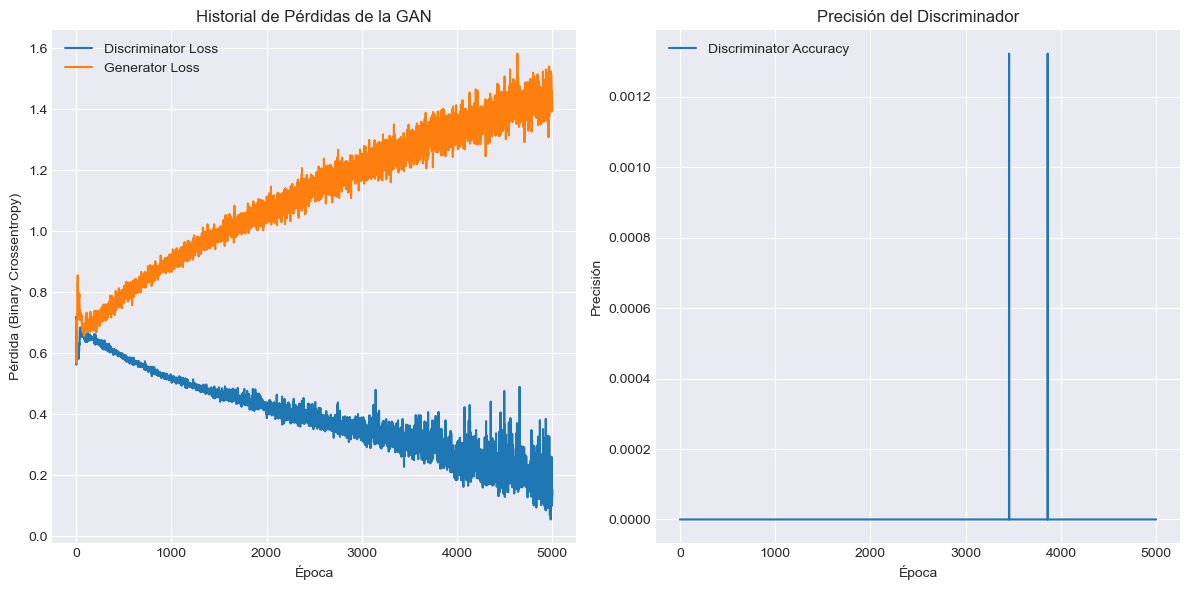

In [ ]:
# 13.3 Entrenamiento del Modelo GAN Personalizado

# Ahora usamos el método `.fit()` estándar de Keras, que llamará a nuestro `train_step` personalizado.
# Le pasamos solo los datos reales de fraude escalados (`fraud_data_scaled`).

# --- Hiperparámetros ---
epochs = 5000 
batch_size = 16

# Verificar que las variables existen
if 'gan_model' in locals() and 'fraud_data_scaled' in locals():
    print(f"Iniciando entrenamiento GAN por {epochs} épocas...")
    
    # Entrenar usando .fit()
    # Nota: No pasamos 'y', ya que train_step solo necesita los datos reales 'x'
    history = gan_model.fit(
        fraud_data_scaled, 
        epochs=epochs, 
        batch_size=batch_size,
        verbose=1 # Muestra una barra de progreso por época y las métricas al final de cada época
    )
    
    print("\nEntrenamiento de la GAN completado.")

    # Graficar historial de pérdidas (obtenido de history.history)
    if history and hasattr(history, 'history'):
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        if 'd_loss' in history.history:
            plt.plot(history.history['d_loss'], label='Discriminator Loss')
        if 'g_loss' in history.history:
            plt.plot(history.history['g_loss'], label='Generator Loss')
        plt.title('Historial de Pérdidas de la GAN')
        plt.xlabel('Época')
        plt.ylabel('Pérdida (Binary Crossentropy)')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        if 'd_acc' in history.history:
            plt.plot(history.history['d_acc'], label='Discriminator Accuracy')
            plt.title('Precisión del Discriminador')
            plt.xlabel('Época')
            plt.ylabel('Precisión')
            plt.legend()
    
        plt.tight_layout()
        plt.show()

else:
    print("Faltan variables necesarias (gan_model o fraud_data_scaled).")
    print("Asegúrate de haber ejecutado las celdas anteriores.")

__Interpretación de los gráficos:__

1. Historial de Pérdidas (Gráfico Izquierdo):
    - Discriminator Loss (Azul): Empieza en torno a 0.7 y disminuye gradualmente, manteniéndose por encima de cero y mostrando cierta variabilidad/ruido al final, pero sin colapsar ni explotar. Esto es bueno, sugiere que el discriminador está aprendiendo pero no está "ganando" de forma aplastante.
    - Generator Loss (Naranja): Empieza también cerca de 0.7-0.8 y tiende a aumentar gradualmente a lo largo de las épocas, terminando cerca de 1.4-1.5, también con ruido. Que la pérdida del generador aumente mientras la del discriminador baja puede indicar que el generador está teniendo que "esforzarse" más para intentar engañar a un discriminador que mejora, lo cual puede ser una señal de aprendizaje productivo.
    - Convergencia/Equilibrio: Aunque no vemos un punto claro donde ambas pérdidas se estabilizan o convergen a un valor similar (como a veces se busca teóricamente, cerca de log(0.5)≈0.69).

2. Precisión del Discriminador (Gráfico Derecho):
    - Parece poco fiable debido a la escala extremadamente baja del eje Y (cerca de 0.0013).

__Conclusión General del Entrenamiento:__

El entrenamiento con los parámetros `(epochs=5000, batch_size=16 y learning_rate = 0.0001)` fue mucho más estable que `(epochs = 15000, batch_size = 64 y learning_rate = 0.0002)`.

Aunque no se alcanzó un equilibrio perfecto, la dinámica de pérdidas (D bajando sin colapsar, G subiendo) es compatible con un proceso de aprendizaje adversarial potencialmente útil.

Es razonable suponer que el generador entrenado durante estas 5000 épocas ha aprendido algo sobre la distribución de los datos de fraude y podría generar muestras sintéticas de cierta utilidad.

#### 13.4 Generar Muestras Sintéticas de Fraude con la GAN Entrenada

In [91]:
# 13.4 Generar Muestras Sintéticas de Fraude con la GAN Entrenada

# Usamos el modelo Generador (`generator`) entrenado para crear nuevas muestras sintéticas.
# Generaremos suficientes muestras para igualar el número de muestras de la clase mayoritaria 
# en el conjunto de entrenamiento original (`X_train`, `y_train`).

import numpy as np
import pandas as pd

# Verificar que las variables necesarias existen
if ('generator' in locals() and generator is not None and 
    'X_train' in locals() and 'y_train' in locals() and 
    'latent_dim' in locals()):

    # Contar cuántas muestras legítimas (clase 0) hay en el set de entrenamiento original
    num_legit_train = (y_train == 0).sum()
    # Contar cuántas muestras de fraude (clase 1) hay en el set de entrenamiento original
    num_fraud_train = (y_train == 1).sum()
    
    # Calcular cuántas muestras sintéticas necesitamos generar
    num_synthetic_needed = num_legit_train - num_fraud_train
    
    if num_synthetic_needed > 0:
        print(f"Clase mayoritaria (0) en train: {num_legit_train}")
        print(f"Clase minoritaria (1) en train: {num_fraud_train}")
        print(f"Necesitamos generar {num_synthetic_needed} muestras sintéticas de fraude.")

        # Generar ruido aleatorio como entrada para el generador
        noise = np.random.normal(0, 1, (num_synthetic_needed, latent_dim))
        
        print("\nGenerando muestras sintéticas con el Generador...")
        # Usar el generador para crear las muestras
        synthetic_fraud_samples_scaled = generator.predict(noise)
        print("Muestras sintéticas generadas.")
        print(f"Shape de las muestras sintéticas generadas (escaladas): {synthetic_fraud_samples_scaled.shape}")

        # --- Paso Importante: Des-escalar las muestras sintéticas ---
        # Debemos llevarlas de vuelta a la escala original de los datos, usando el
        # scaler que ajustamos ANTES de entrenar la GAN (scaler_gan).
        if 'scaler_gan' in locals() and scaler_gan is not None:
            print("\nDes-escalando las muestras sintéticas a la escala original...")
            synthetic_fraud_samples = scaler_gan.inverse_transform(synthetic_fraud_samples_scaled)
            print("Des-escalado completado.")
            print(f"Shape de las muestras sintéticas (des-escaladas): {synthetic_fraud_samples.shape}")
            
            # Crear un DataFrame para las muestras sintéticas con las columnas originales de X_train
            synthetic_fraud_df = pd.DataFrame(synthetic_fraud_samples, columns=X_train.columns)
            
            print("\nDataFrame 'synthetic_fraud_df' creado con muestras sintéticas de fraude.")
            
        else:
            print("\nERROR: No se encontró 'scaler_gan'. No se pueden des-escalar las muestras.")
            synthetic_fraud_df = None

    else:
        print("El conjunto de entrenamiento original ya parece balanceado o no tiene clase minoritaria.")
        synthetic_fraud_df = None

else:
    print("Faltan variables necesarias (generator, X_train, y_train, latent_dim).")
    print("Asegúrate de haber ejecutado las celdas anteriores.")

Clase mayoritaria (0) en train: 226602
Clase minoritaria (1) en train: 378
Necesitamos generar 226224 muestras sintéticas de fraude.

Generando muestras sintéticas con el Generador...
7070/7070 ━━━━━━━━━━━━━━━━━━━━ 6s 778us/step
Muestras sintéticas generadas.
Shape de las muestras sintéticas generadas (escaladas): (226224, 30)

Des-escalando las muestras sintéticas a la escala original...
Des-escalado completado.
Shape de las muestras sintéticas (des-escaladas): (226224, 30)

DataFrame 'synthetic_fraud_df' creado con muestras sintéticas de fraude.


#### 13.5 Crear Conjunto de Entrenamiento Aumentado con GAN

In [92]:
# 13.5 Crear Conjunto de Entrenamiento Aumentado con GAN

# Combinamos los datos de entrenamiento originales (`X_train`, `y_train`) 
# con las muestras de fraude sintéticas generadas por la GAN (`synthetic_fraud_df`).
# Es crucial barajar (shuffle) el dataset resultante.

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import collections # Para verificar conteo

# Verificar que las variables necesarias existen
if ('X_train' in locals() and 'y_train' in locals() and 
    'synthetic_fraud_df' in locals() and synthetic_fraud_df is not None):

    print(f"Shape de X_train original: {X_train.shape}")
    print(f"Shape de y_train original: {y_train.shape}")
    print(f"Shape de synthetic_fraud_df: {synthetic_fraud_df.shape}")

    # Crear etiquetas para los datos sintéticos (todas son clase 1 - Fraude)
    synthetic_labels = np.ones(len(synthetic_fraud_df), dtype=int)
    
    # Convertir y_train a Series de Pandas si no lo es (para concatenar fácilmente)
    if not isinstance(y_train, pd.Series):
        y_train_series = pd.Series(y_train, index=X_train.index, name='Class')
    else:
        y_train_series = y_train
        
    # Convertir etiquetas sintéticas a Series de Pandas (opcional, pero ayuda a concatenar)
    synthetic_labels_series = pd.Series(synthetic_labels, name='Class')

    # Combinar las características originales y sintéticas
    X_train_gan = pd.concat([X_train, synthetic_fraud_df], ignore_index=True)
    
    # Combinar las etiquetas originales y sintéticas
    y_train_gan = pd.concat([y_train_series, synthetic_labels_series], ignore_index=True)

    print("\nDatos combinados.")
    print(f"Shape de X_train_gan (combinado): {X_train_gan.shape}")
    print(f"Shape de y_train_gan (combinado): {y_train_gan.shape}")

    # --- Barajar (Shuffle) el conjunto de entrenamiento aumentado ---
    print("\nBarajando el conjunto de entrenamiento aumentado...")
    X_train_gan, y_train_gan = shuffle(X_train_gan, y_train_gan, random_state=42)
    print("Barajado completado.")

    # Verificar la nueva distribución de clases
    print(f"\nDistribución de clases en entrenamiento aumentado con GAN: {collections.Counter(y_train_gan)}")
    print("\nConjunto de datos 'X_train_gan' y 'y_train_gan' listo para entrenar.")

else:
    print("Faltan variables necesarias (X_train, y_train, synthetic_fraud_df).")
    print("Asegúrate de haber ejecutado las celdas anteriores.")

Shape de X_train original: (226980, 30)
Shape de y_train original: (226980,)
Shape de synthetic_fraud_df: (226224, 30)

Datos combinados.
Shape de X_train_gan (combinado): (453204, 30)
Shape de y_train_gan (combinado): (453204,)

Barajando el conjunto de entrenamiento aumentado...
Barajado completado.

Distribución de clases en entrenamiento aumentado con GAN: Counter({0: 226602, 1: 226602})

Conjunto de datos 'X_train_gan' y 'y_train_gan' listo para entrenar.


#### 13.6 Entrenar y Evaluar Clasificador (NN) con Datos Aumentados por GAN

Entrenando Red Neuronal (MLP) con datos aumentados por GAN...
Entrenamiento completado en 22.82 segundos.

Realizando predicciones en el conjunto de prueba...
Predicciones completadas en 0.08 segundos.

--- Evaluación de la Red Neuronal (entrenada con datos GAN) ---

Matriz de Confusión:
[[56642     9]
 [   24    71]]


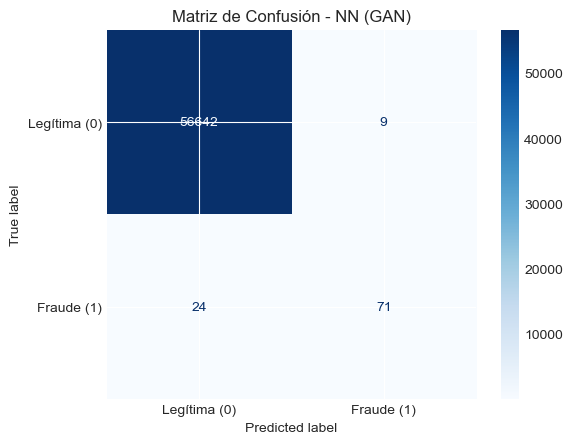


Reporte de Clasificación:
              precision    recall  f1-score   support

Legítima (0)       1.00      1.00      1.00     56651
  Fraude (1)       0.89      0.75      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

AUC ROC: 0.9625
AUC Precision-Recall (AUC PR): 0.8103


In [93]:
# 13.6: Entrenar y Evaluar Clasificador (NN) con Datos Aumentados por GAN

# Entrenamos el mismo modelo de Red Neuronal (MLP) que usamos en el Paso 12, 
# pero esta vez utilizando el conjunto de entrenamiento balanceado con las muestras 
# sintéticas generadas por la GAN (`X_train_gan`, `y_train_gan`). 
# Evaluamos en el conjunto de prueba original (`X_test`, `y_test`).

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ( 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_recall_curve, 
    auc,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt 
import numpy as np
import time 

# Verificar que los datos existen
if ('X_train_gan' in locals() and 'y_train_gan' in locals() and 
    'X_test' in locals() and 'y_test' in locals()):
    
    print("Entrenando Red Neuronal (MLP) con datos aumentados por GAN...")
    
    # Medir tiempo de inicio 
    start_time_nn_gan = time.time()
    
    # 1. Instanciar el modelo (con los mismos parametros que nn_smote)
    nn_gan = MLPClassifier(
        hidden_layer_sizes=(64, 32),  # Misma arquitectura que antes
        activation='relu',          
        solver='adam',              
        alpha=0.0001,               
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=300,              
        shuffle=True,
        random_state=42,           # Misma semilla para reproducibilidad
        early_stopping=True,       
        validation_fraction=0.1,   
        n_iter_no_change=10,       
        verbose=False              # Poner False para no imprimir progreso época por época esta vez 
    ) 
    
    # 2. Entrenar el modelo con los datos aumentados por GAN
    nn_gan.fit(X_train_gan, y_train_gan)
    
    # Medir tiempo de fin 
    end_time_nn_gan = time.time()
    training_time_nn_gan = end_time_nn_gan - start_time_nn_gan
    print(f"Entrenamiento completado en {training_time_nn_gan:.2f} segundos.")
    
    # 3. Realizar predicciones en el conjunto de prueba (X_test)
    print("\nRealizando predicciones en el conjunto de prueba...")
    start_pred_time_nn_gan = time.time()
    y_pred_nn_gan = nn_gan.predict(X_test)
    y_prob_nn_gan = nn_gan.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (1)
    end_pred_time_nn_gan = time.time()
    prediction_time_nn_gan = end_pred_time_nn_gan - start_pred_time_nn_gan
    print(f"Predicciones completadas en {prediction_time_nn_gan:.2f} segundos.")
    
    # 4. Evaluar el modelo
    print("\n--- Evaluación de la Red Neuronal (entrenada con datos GAN) ---")
    
    # Matriz de Confusión
    print("\nMatriz de Confusión:")
    cm_nn_gan = confusion_matrix(y_test, y_pred_nn_gan)
    print(cm_nn_gan)
    # Visualizar la matriz de confusión
    disp_nn_gan = ConfusionMatrixDisplay(confusion_matrix=cm_nn_gan, display_labels=['Legítima (0)', 'Fraude (1)'])
    disp_nn_gan.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión - NN (GAN)')
    plt.show()
    
    # Reporte de Clasificación (Precision, Recall, F1-score)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_nn_gan, target_names=['Legítima (0)', 'Fraude (1)']))
    
    # AUC ROC
    if len(np.unique(y_test)) > 1: # Check para evitar error si solo hay una clase en y_test
        auc_roc_nn_gan = roc_auc_score(y_test, y_prob_nn_gan)
        print(f"AUC ROC: {auc_roc_nn_gan:.4f}")
    
        # AUC PR (Precision-Recall)
        precision_nn_gan, recall_nn_gan, _ = precision_recall_curve(y_test, y_prob_nn_gan)
        auc_pr_nn_gan = auc(recall_nn_gan, precision_nn_gan)
        print(f"AUC Precision-Recall (AUC PR): {auc_pr_nn_gan:.4f}")
    else:
        print("AUC ROC y AUC PR no se pueden calcular porque solo hay una clase en y_test.")

else:
    print("No se encontraron los DataFrames/Series de entrenamiento (X_train_gan, y_train_gan) o prueba.")
    print("Asegúrate de haber ejecutado las celdas anteriores primero.")

__Resultados de la Red Neuronal (con GAN):__

1. Matriz de Confusión: `[[56642, 9], [ 24, 71]]`
    * TN = 56642 (Legítimas Ok)
    * FP = 9 (Increíblemente bajo. Menos falsas alarmas que con SMOTE).
    * FN = 24 (Fraudes Perdidos - Ligeramente más que con SMOTE).
    * TP = 71 (Fraudes Ok - Ligeramente menos que con SMOTE).

2. Reporte de Clasificación (para Fraude - Clase 1):
    * Precision = 0.89: ¡Excelente! Mucho mejor que el 0.74 obtenido con SMOTE. Cuando este modelo marca algo como fraude, acierta el 89% de las veces.
    * Recall = 0.75: Bueno. Ligeramente inferior al 0.77 obtenido con SMOTE, pero aún así detecta el 75% de los fraudes.
    * F1-score = 0.81: Excelente. El mejor F1-score hasta ahora, superando el 0.75 de NN(SMOTE), gracias a la alta precisión.

3. Métricas AUC:
    * AUC ROC = 0.9625: Muy bueno. Ligeramente superior al 0.9446 de NN(SMOTE).
    * AUC PR = 0.8103: ¡Excelente! Notablemente superior al 0.7752 de NN(SMOTE), indicando el mejor rendimiento en el compromiso Precisión-Recall para la clase minoritaria.

4. Tiempo: El entrenamiento fue muy rápido (~23s), lo cual es interesante.


| Métrica               | NN (SMOTE) | NN (GAN) | Ganador         | Observación Clave                   |
| :-------------------- | :--------- | :------- | :-------------- | :---------------------------------- |
| **Recall (Fraude)** | 0.77       | 0.75     | SMOTE (por poco) | Ligera caída en detección con GAN  |
| **Precision (Fraude)**| 0.74       | 0.89     | GAN             | Mejora drástica en falsas alarmas   |
| **F1-Score (Fraude)** | 0.75       | 0.81     | GAN             | Mejor balance general P/R           |
| **FP (Falsas Alarmas)**| 26         | 9        | GAN             | Reducción muy significativa         |
| **FN (Fraudes Perdidos)**| 22         | 24       | SMOTE (por poco) | GAN pierde 2 fraudes más          |
| **AUC ROC** | 0.9446     | 0.9625   | GAN             | Mejora general en discriminación   |
| **AUC PR** | 0.7752     | 0.8103   | GAN             | Mejor rendimiento P/R global      |


__Interpretación de la Comparación:__

* La GAN funciona mejor que SMOTE en este caso. A pesar de la inestabilidad que vimos durante el entrenamiento de la GAN, las muestras sintéticas que generó permitieron entrenar una Red Neuronal que supera a la entrenada con SMOTE en las métricas más importantes para este problema (F1-score, AUC PR).

* La mejora más significativa está en la Precisión. El modelo NN(GAN) es mucho más fiable cuando predice fraude, generando muy pocas falsas alarmas (solo 9 FP).

* Hay una pequeña contrapartida en el Recall (se pierden 2 fraudes más), pero la ganancia en Precisión compensa con creces, como refleja el F1-score y el AUC PR más altos.

* El AUC ROC y AUC PR superiores sugieren que los datos generados por la GAN, aunque quizás no perfectos, ayudaron al modelo NN a aprender una frontera de decisión más efectiva que con SMOTE.


__Conclusión Final de los Experimentos:__

Basado en los resultados con este dataset y estas configuraciones:

1. Tanto SMOTE como GAN ayudaron a mejorar la detección de fraude (Recall) comparado con lo que probablemente haría un modelo sin balanceo.

2. La Red Neuronal (MLP) fue el mejor clasificador de los tres probados (DT, SVM, NN).

3. El aumento de datos con GAN produjo un mejor rendimiento general para la Red Neuronal que el aumento con SMOTE, principalmente debido a una drástica reducción de las falsas alarmas (mayor precisión).